In [1]:
# system stuff
import sys
sys.path.append("..")
import datetime

# galpy stuff
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

# auriga stuff
from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

# main packages stuff
import numpy as np
from scipy import stats

# python stuff
import random
import copy

# plot stuff
from IPython.display import Image, display
import corner

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from matplotlib import rcParams
from matplotlib import colors

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'
cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

# display stuff
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
# Simulation relevant stuff
machine = 'virgo'
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    

In [3]:
# load potential parameters
R0_kpc_all, v0_kms_all, a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all = np.loadtxt(filedir + 'potential/fitted_potential_params_jan19.txt')

n_MND  = v0_MND_kms_all**2  / v0_kms_all**2
n_NFWH = v0_NFWH_kms_all**2 / v0_kms_all**2
n_HB   = v0_HB_kms_all**2   / v0_kms_all**2

In [4]:
def setup_galpy_potential(a_MND_kpc, b_MND_kpc, a_NFWH_kpc, a_HB_kpc, n_MND, n_NFWH, n_HB, _REFR0_kpc):
    
    #test input:
    if (a_MND_kpc <= 0.) or (b_MND_kpc <= 0.) or (a_NFWH_kpc <= 0.) or (a_HB_kpc <= 0.) \
       or (n_MND <= 0.) or (n_NFWH <= 0.) or (n_HB <= 0.) or (n_MND >= 1.) or (n_NFWH >= 1.) or (n_HB >= 1.):
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The input parameters for the scaling profiles do not correspond to a physical potential.')
    if np.fabs(n_MND + n_NFWH + n_HB - 1.) > 2e-2:
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The sum of the normalization does not add up to 1.')
        
    #trafo to galpy units:
    a_MND  = a_MND_kpc  / _REFR0_kpc
    b_MND  = b_MND_kpc  / _REFR0_kpc
    a_NFWH = a_NFWH_kpc / _REFR0_kpc
    a_HB   = a_HB_kpc   / _REFR0_kpc
    
    #setup potential:
    disk = MiyamotoNagaiPotential(
                a = a_MND,
                b = b_MND,
                normalize = n_MND)
    halo = NFWPotential(
                a = a_NFWH,
                normalize = n_NFWH)
    bulge = HernquistPotential(
                a = a_HB,
                normalize = n_HB) 
     
    return [disk,halo,bulge]

exclude particles which are in disk
level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0007868712714088.
14:32:49.576775
0
14:33:41.835465
1000
14:34:42.280611
2000
14:35:47.920185
3000
14:36:55.180782
4000
14:38:04.623272
5000
14:39:14.314516
6000
14:40:15.410340
7000
14:41:19.940027
8000
14:42:29.239461
9000
14:43:33.409591
10000
14:44:40.436981
11000
14:45:26.100696
12000
14:46:30.518574
13000
14:47:31.712347
14000
14:48:22.964070
15000
14:49:28.519963
16000
14:50:31.857537
17000
14:51:34.817044
18000
14:52:37.519210
19000
14:53:39.718148
20000
14:54:43.527350
21000
14:55:36.098891
22000


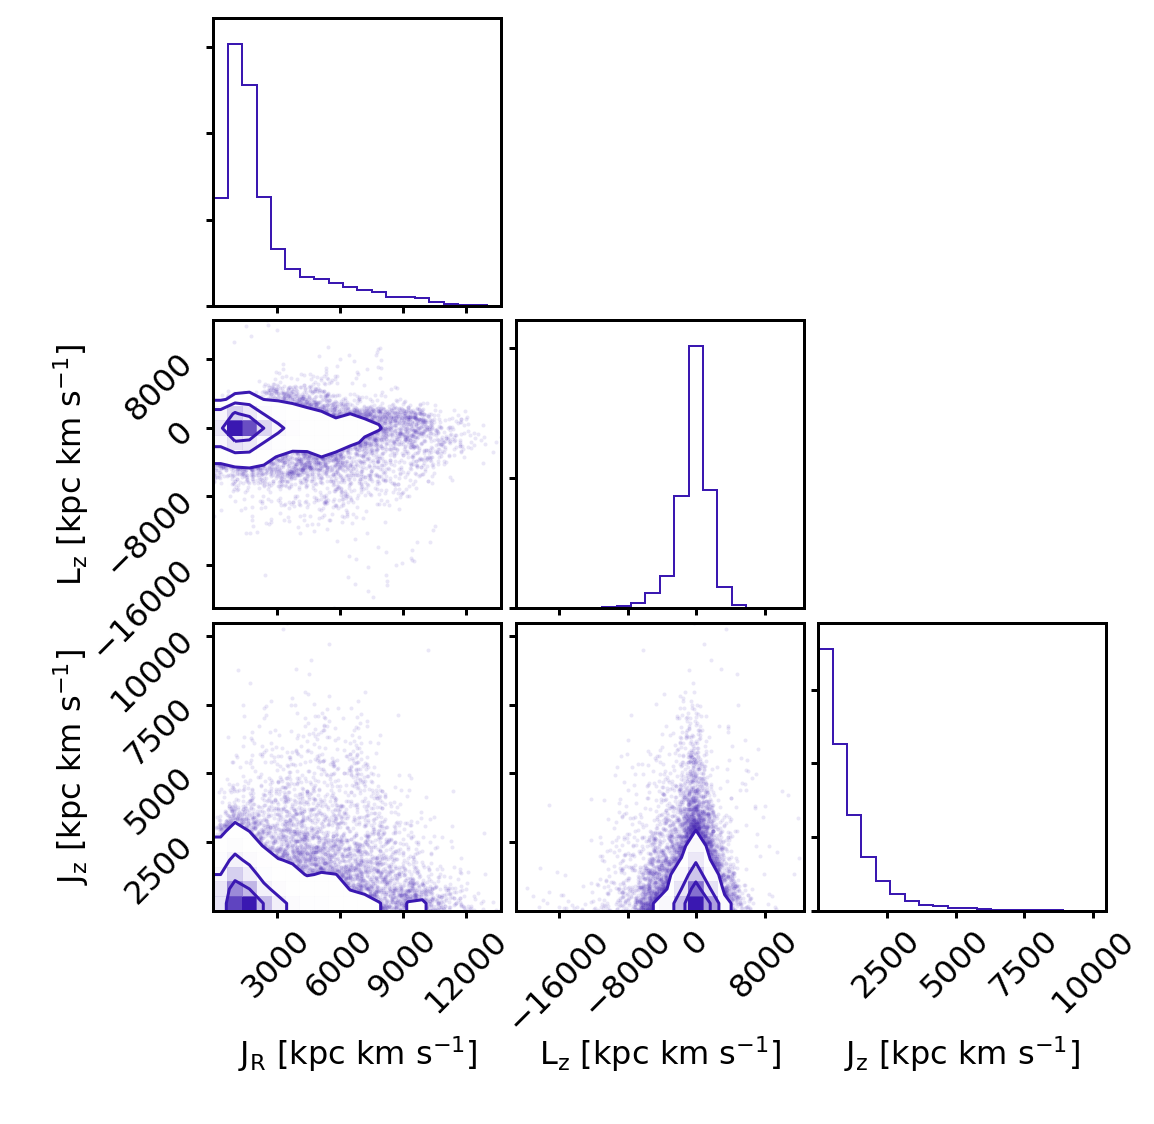

level   : 4
halo    : 24
snapnr  : 126
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1774142 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023996514081954957
redshift: 0.009521666967944764
time    : 0.99056814006128
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0004838839599297.
14:56:16.291423
0
14:57:23.065292
1000
14:58:31.475990
2000
14:59:38.207577
3000
15:00:41.515793
4000
15:01:45.094627
5000
15:02:34.140580
6000
15:03:26.975475
7000
15:04:04.132603
8000
15:05:02.795946
9000
15:06:04.541823
10000
15:07:05.645685
11000
15:08:06.493557
12000
15:08:54.698786
13000
15:09:53.962430
14000
15:10:51.940581
15000
15:11:52.669296
16000
15:12:53.721375
17000
15:13:53.152091
18000
15:14:51.543864
19000
15:15:45.370470
20000
15:16:45.230142
21000
15:17:43.929668
22000
Number of GCs w/o actions: 0
None


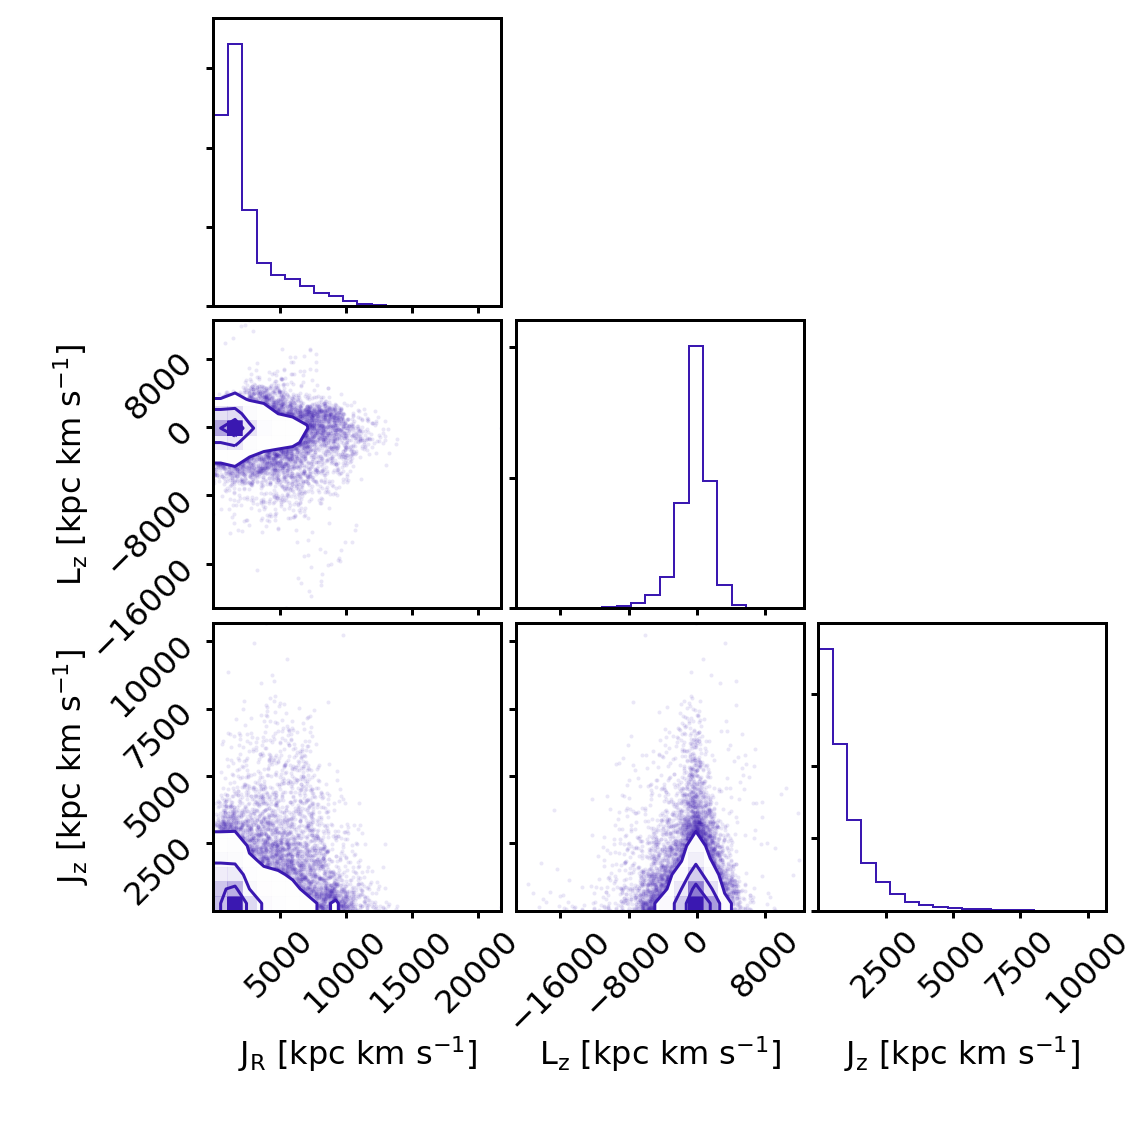

level   : 4
halo    : 24
snapnr  : 125
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1769475 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023806245625019075
redshift: 0.023974428382762536
time    : 0.9765868876036025
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9998653773018424.
15:18:22.034161
0
15:19:21.446238
1000
15:20:21.595769
2000
15:21:22.068650
3000
15:22:14.634416
4000
15:23:18.739874
5000
15:24:21.637051
6000
15:25:06.101341
7000
15:26:06.811170
8000
15:27:10.917978
9000
15:28:11.569196
10000
15:29:02.513276
11000
15:30:02.523243
12000
15:31:01.443846
13000
15:32:01.412491
14000
15:33:01.432035
15000
15:34:01.087741
16000
15:35:00.081193
17000
15:35:50.168601
18000
15:36:58.701412
19000
15:38:05.762714
20000
15:39:05.809253
21000
15:40:07.807140
22000
Number of GCs w/o actions: 0
None


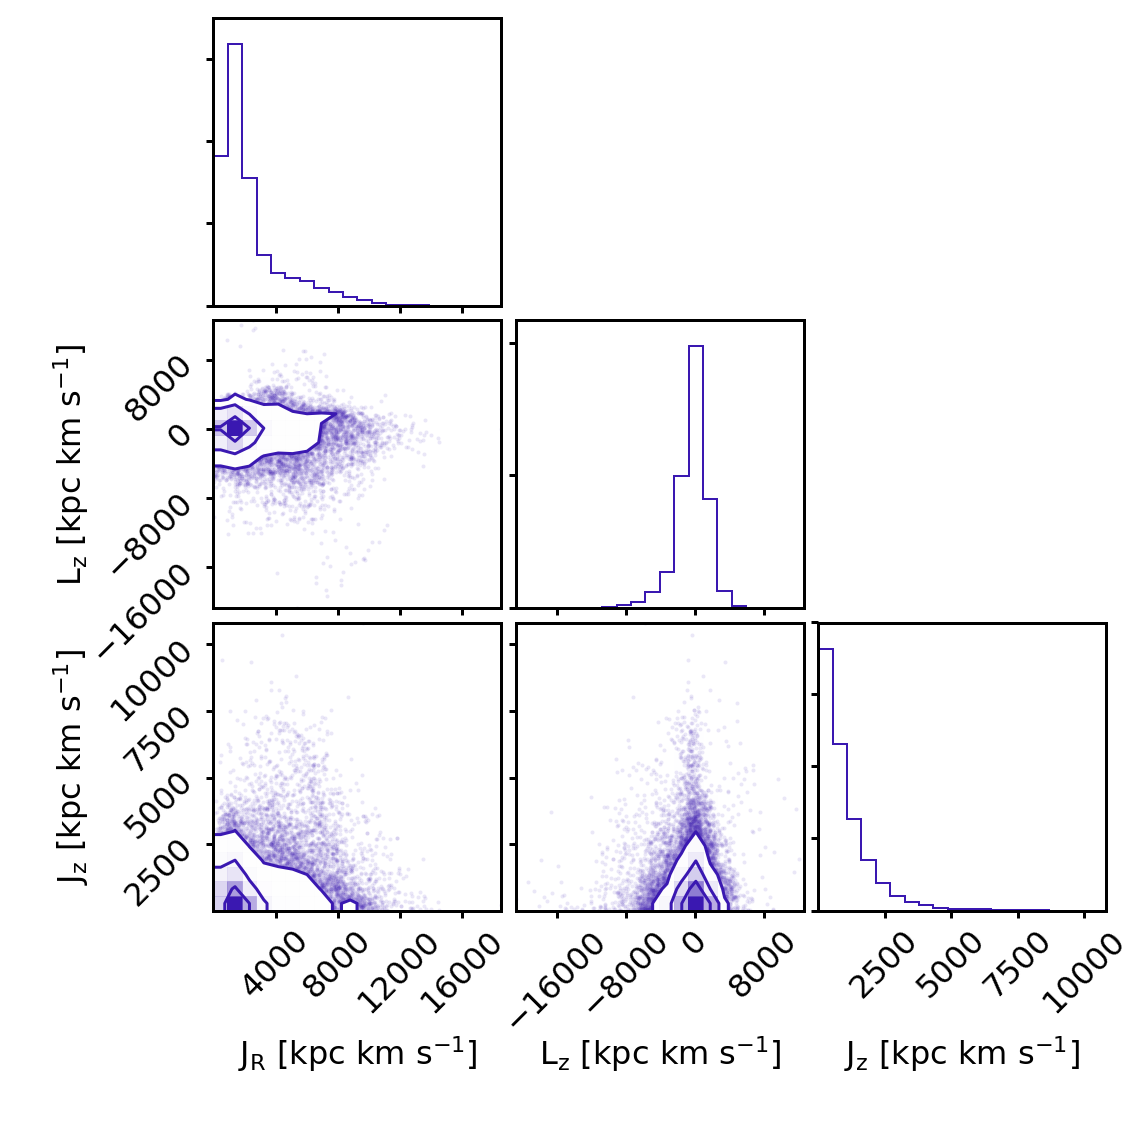

level   : 4
halo    : 24
snapnr  : 124
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1758643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02354053109884262
redshift: 0.0337243718735154
time    : 0.9673758568617342
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9993893826829565.
15:40:46.222591
0
15:41:49.620477
1000
15:42:40.026080
2000
15:43:46.818526
3000
15:44:47.849492
4000
15:45:29.199947
5000
15:46:18.282019
6000
15:47:15.979423
7000
15:48:12.425625
8000
15:49:06.271692
9000
15:50:00.214676
10000
15:50:59.900087
11000
15:52:01.059120
12000
15:53:08.786014
13000
15:54:13.414340
14000
15:55:15.124418
15000
15:56:08.646176
16000
15:57:02.912645
17000
15:58:03.190356
18000
15:59:02.223980
19000
16:00:04.735904
20000
16:01:03.815993
21000
16:02:01.946775
22000
Number of GCs w/o actions: 0
None


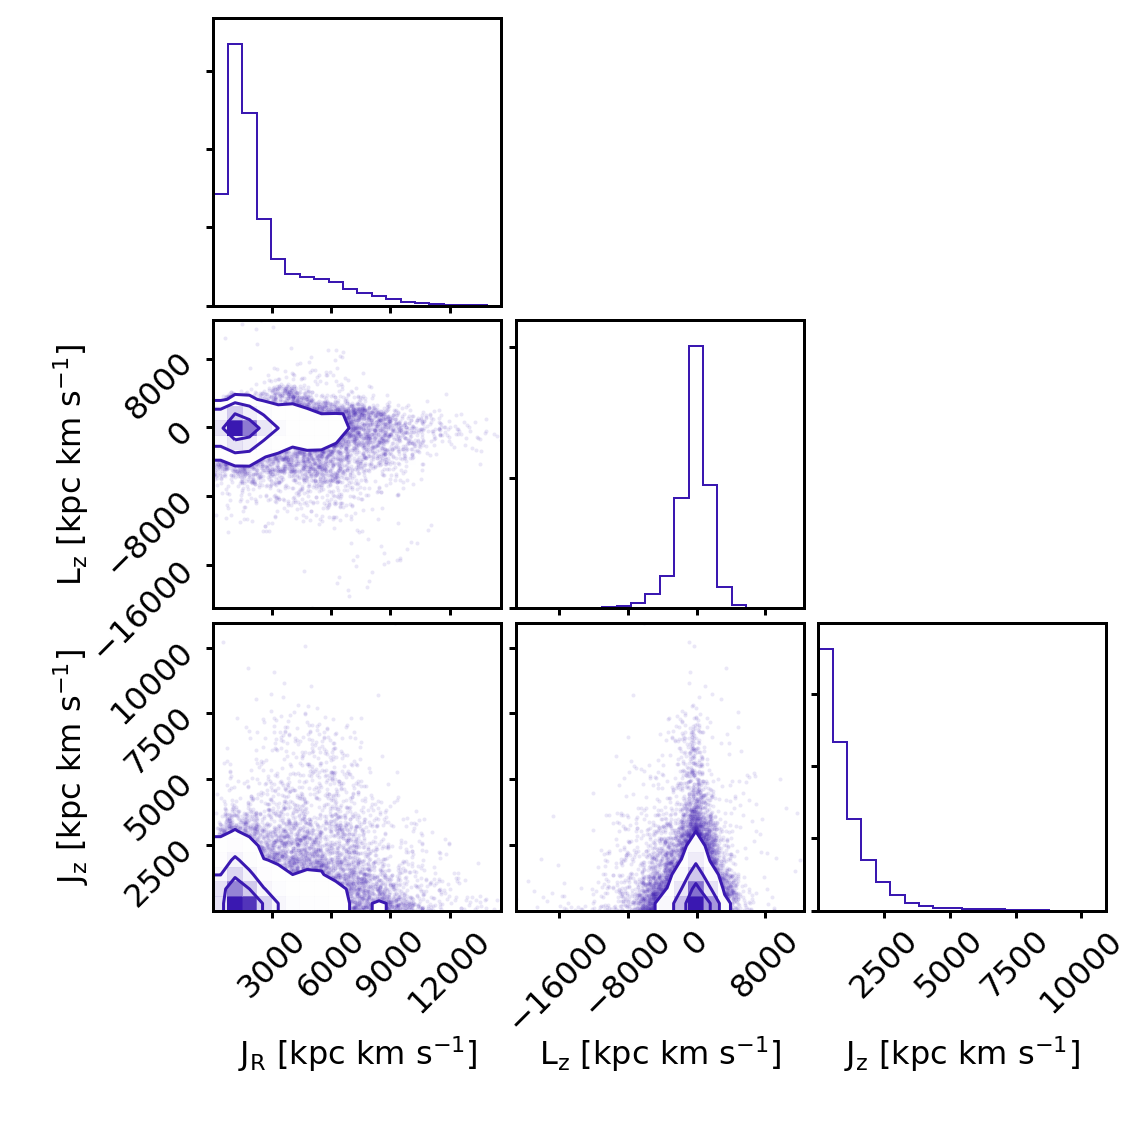

level   : 4
halo    : 24
snapnr  : 123
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755878 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02335823625326157
redshift: 0.04852362998180593
time    : 0.9537219490392906
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9986476048290688.
16:02:41.483887
0
16:03:42.984270
1000
16:04:42.771657
2000
16:05:41.457901
3000
16:06:34.294407
4000
16:07:16.584979
5000
16:08:10.740099
6000
16:08:57.931386
7000
16:09:57.526790
8000
16:10:55.377749
9000
16:11:53.047258
10000
16:12:52.633818
11000
16:13:51.396027
12000
16:14:50.312119
13000
16:15:38.467759
14000
16:16:36.083167
15000
16:17:34.012210
16000
16:18:30.435904
17000
16:19:29.126255
18000
16:20:27.739812
19000
16:21:26.554272
20000
16:22:12.514684
21000
16:23:10.499949
22000
Number of GCs w/o actions: 0
None


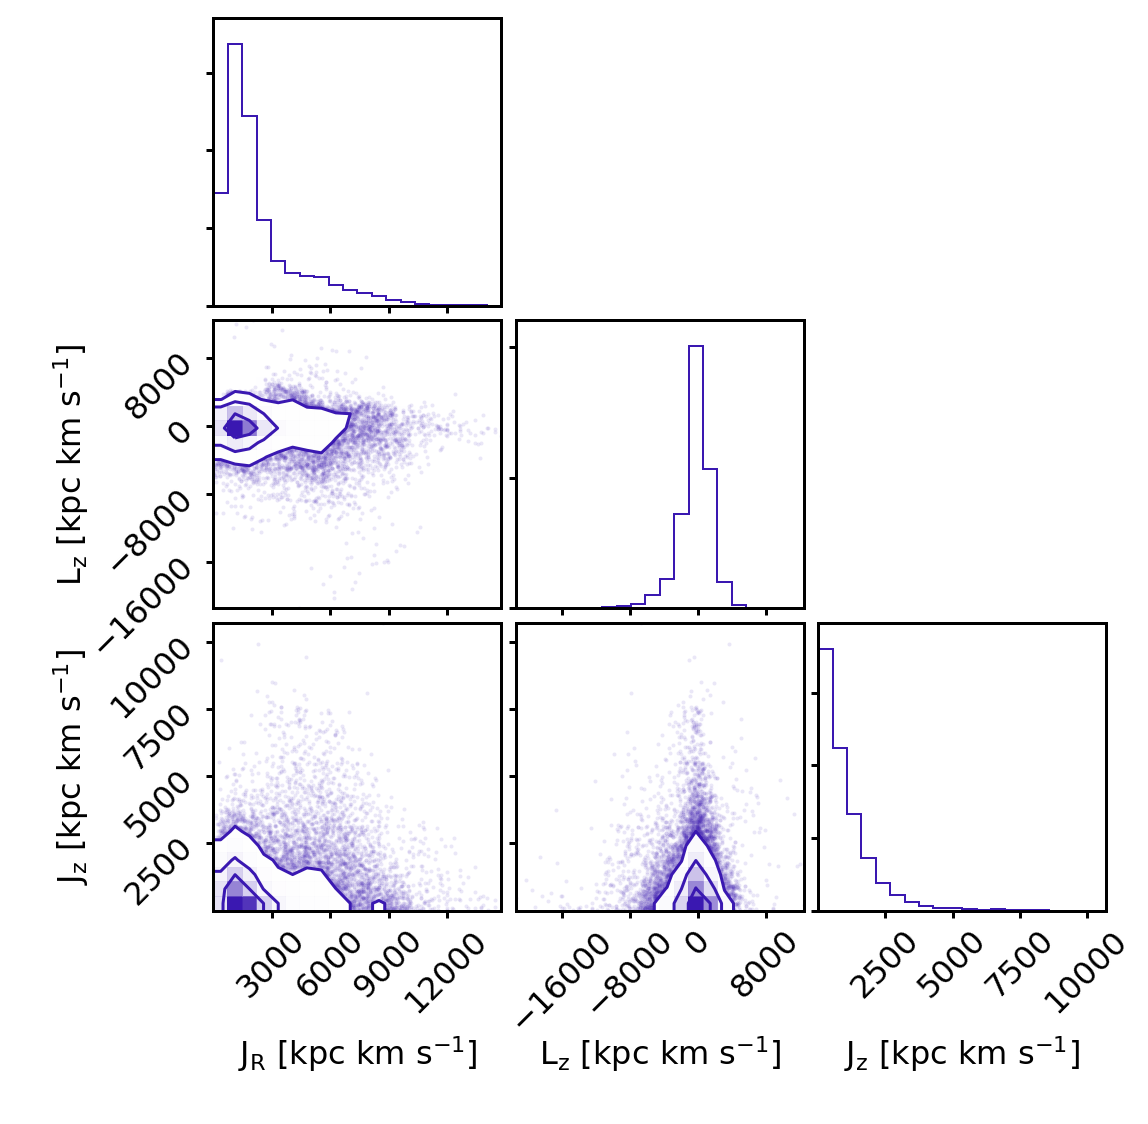

level   : 4
halo    : 24
snapnr  : 122
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023272740840911868
redshift: 0.058507322794512984
time    : 0.9447265771954694
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9981678386024384.
16:23:48.762380
0
16:24:49.509262
1000
16:25:50.789533
2000
16:26:50.851388
3000
16:27:51.309435
4000
16:28:37.118953
5000
16:29:18.697342
6000
16:30:21.076533
7000
16:31:19.086609
8000
16:32:18.979349
9000
16:33:17.605359
10000
16:34:11.899072
11000
16:35:01.557862
12000
16:35:59.177538
13000
16:36:57.241551
14000
16:37:54.247490
15000
16:38:49.411796
16000
16:39:46.087222
17000
16:40:40.229518
18000
16:41:29.374611
19000
16:42:26.629092
20000
16:43:23.480788
21000
16:44:22.091563
22000
Number of GCs w/o actions: 0
None


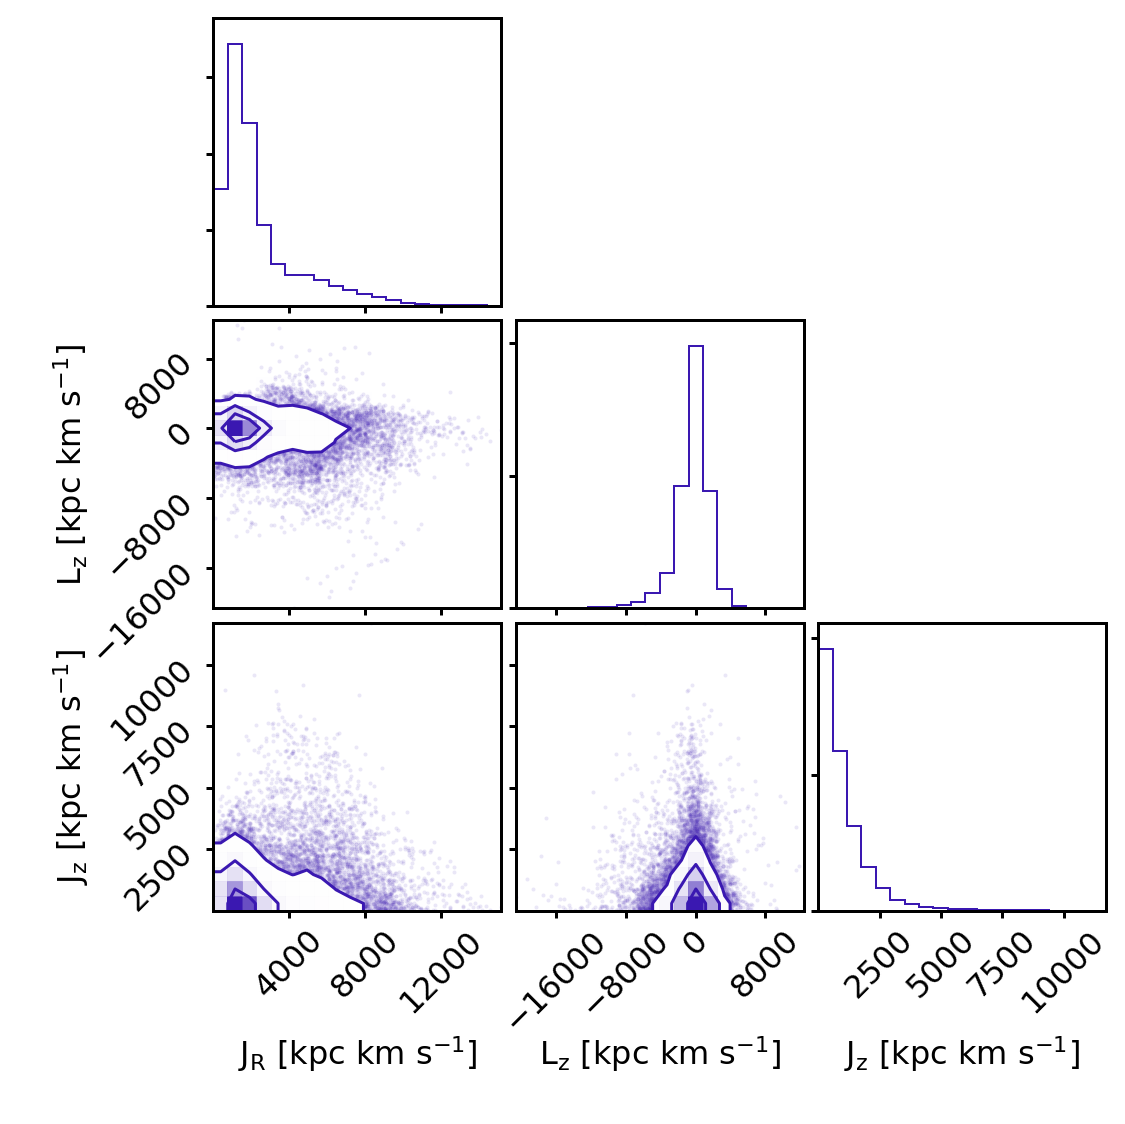

level   : 4
halo    : 24
snapnr  : 121
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1736454 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023151549696922305
redshift: 0.07366138465643868
time    : 0.9313923498515226
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9975168665513926.
16:44:59.129145
0
16:45:57.078935
1000
16:46:53.841315
2000
16:47:40.887127
3000
16:48:39.282425
4000
16:49:39.451650
5000
16:50:40.592428
6000
16:51:35.523495
7000
16:52:15.688752
8000
16:53:15.746387
9000
16:54:05.060018
10000
16:55:05.136716
11000
16:56:05.299903
12000
16:57:04.513733
13000
16:58:04.982318
14000
16:59:05.382241
15000
16:59:53.734261
16000
17:00:53.613622
17000
17:01:53.422002
18000
17:02:51.830101
19000
17:03:51.478372
20000
17:04:52.027266
21000
17:05:50.350687
22000
Number of GCs w/o actions: 0
None


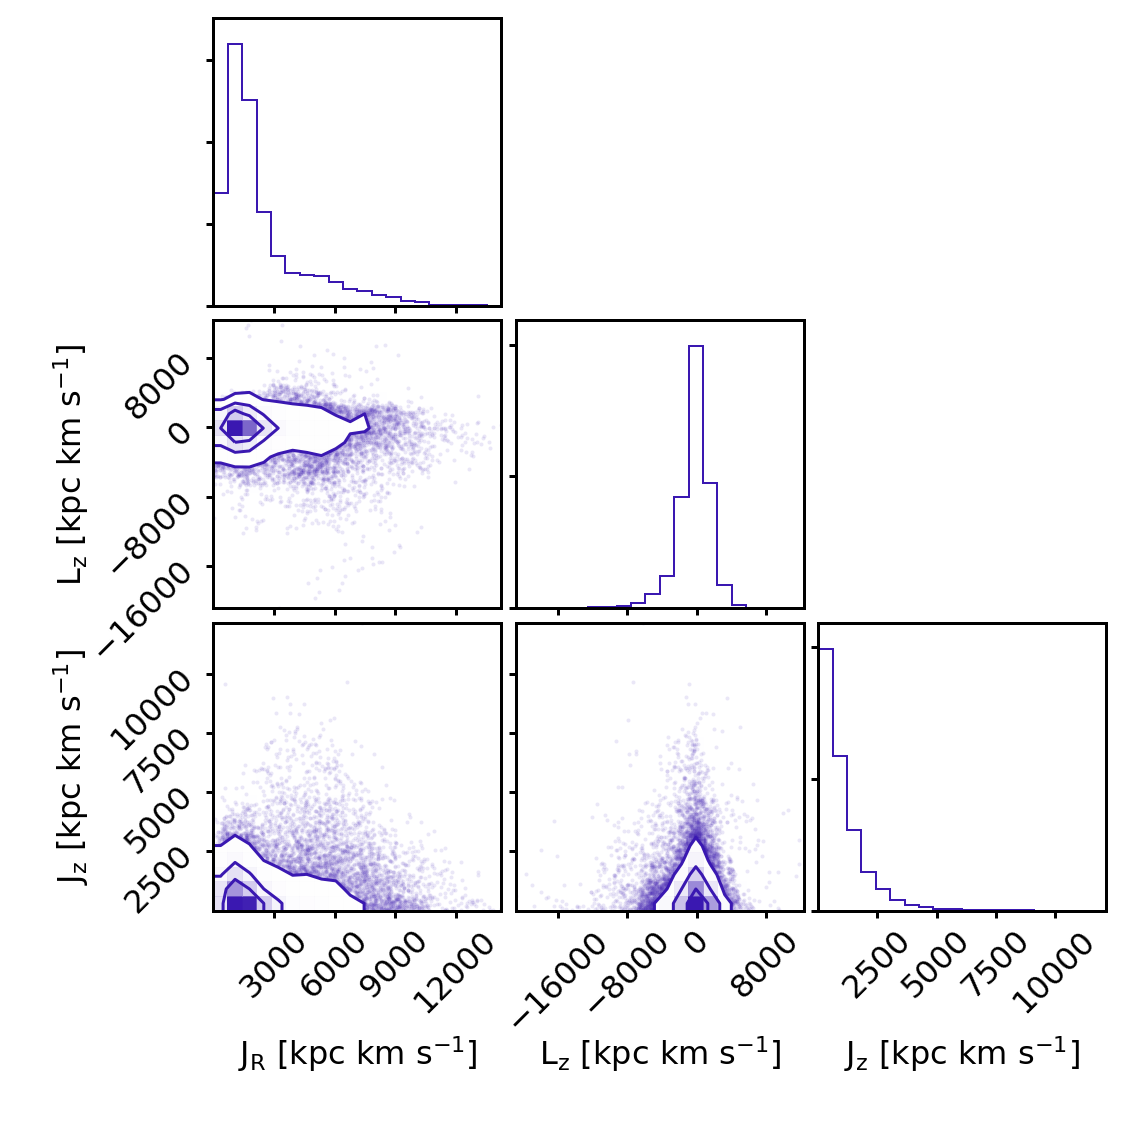

level   : 4
halo    : 24
snapnr  : 120
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1726323 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023094923794269563
redshift: 0.08388443079747931
time    : 0.9226075876597282
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9971498706140278.
17:06:26.681300
0
17:07:24.462578
1000
17:08:22.472093
2000
17:09:21.050961
3000
17:10:20.714263
4000
17:11:20.297815
5000
17:12:13.025617
6000
17:12:57.947104
7000
17:13:42.692350
8000
17:14:20.821566
9000
17:15:13.070217
10000
17:16:12.755957
11000
17:17:11.872927
12000
17:18:10.383856
13000
17:18:59.994676
14000
17:19:59.812206
15000
17:20:58.379159
16000
17:21:56.534734
17000
17:22:55.050330
18000
17:23:58.128978
19000
17:24:51.654521
20000
17:25:43.733165
21000
17:26:42.123348
22000
Number of GCs w/o actions: 0
None


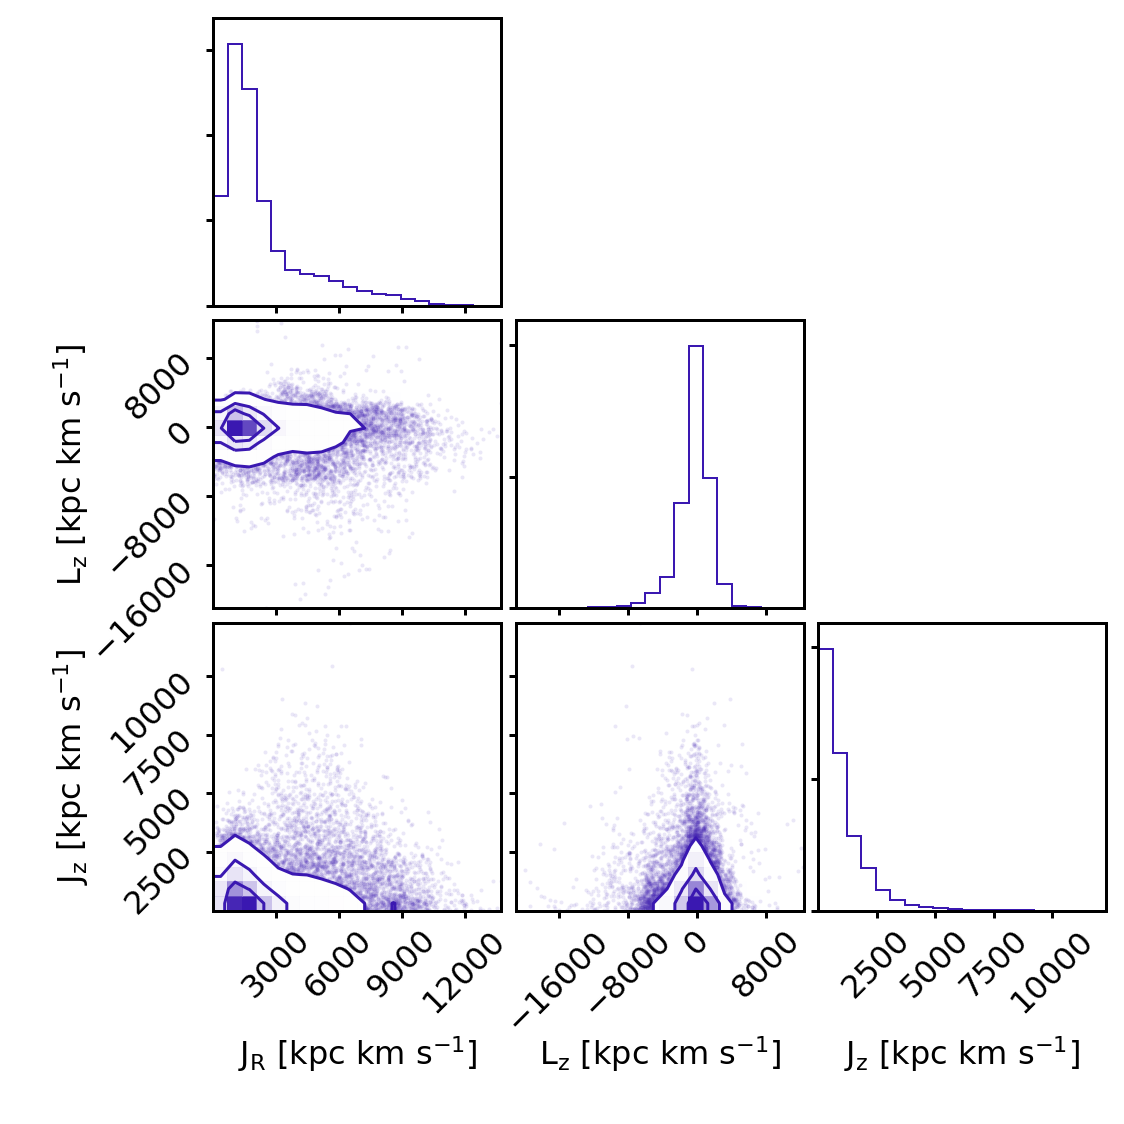

level   : 4
halo    : 24
snapnr  : 119
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1717424 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023062470555305484
redshift: 0.09940180263022191
time    : 0.9095855560793044
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9967264493518566.
17:27:19.553344
0
17:28:20.828393
1000
17:29:19.461963
2000
17:30:19.876100
3000
17:31:11.386697
4000
17:32:10.716852
5000
17:33:07.806765
6000
17:34:03.581248
7000
17:35:00.444924
8000
17:36:00.251151
9000
17:36:58.965133
10000
17:37:28.599100
11000
17:38:10.288937
12000
17:39:07.697790
13000
17:40:06.722666
14000
17:41:05.342738
15000
17:42:06.907460
16000
17:43:08.673987
17000
17:43:57.690438
18000
17:44:55.626909
19000
17:45:50.602328
20000
17:46:44.257655
21000
17:47:42.998912
22000
Number of GCs w/o actions: 0
None


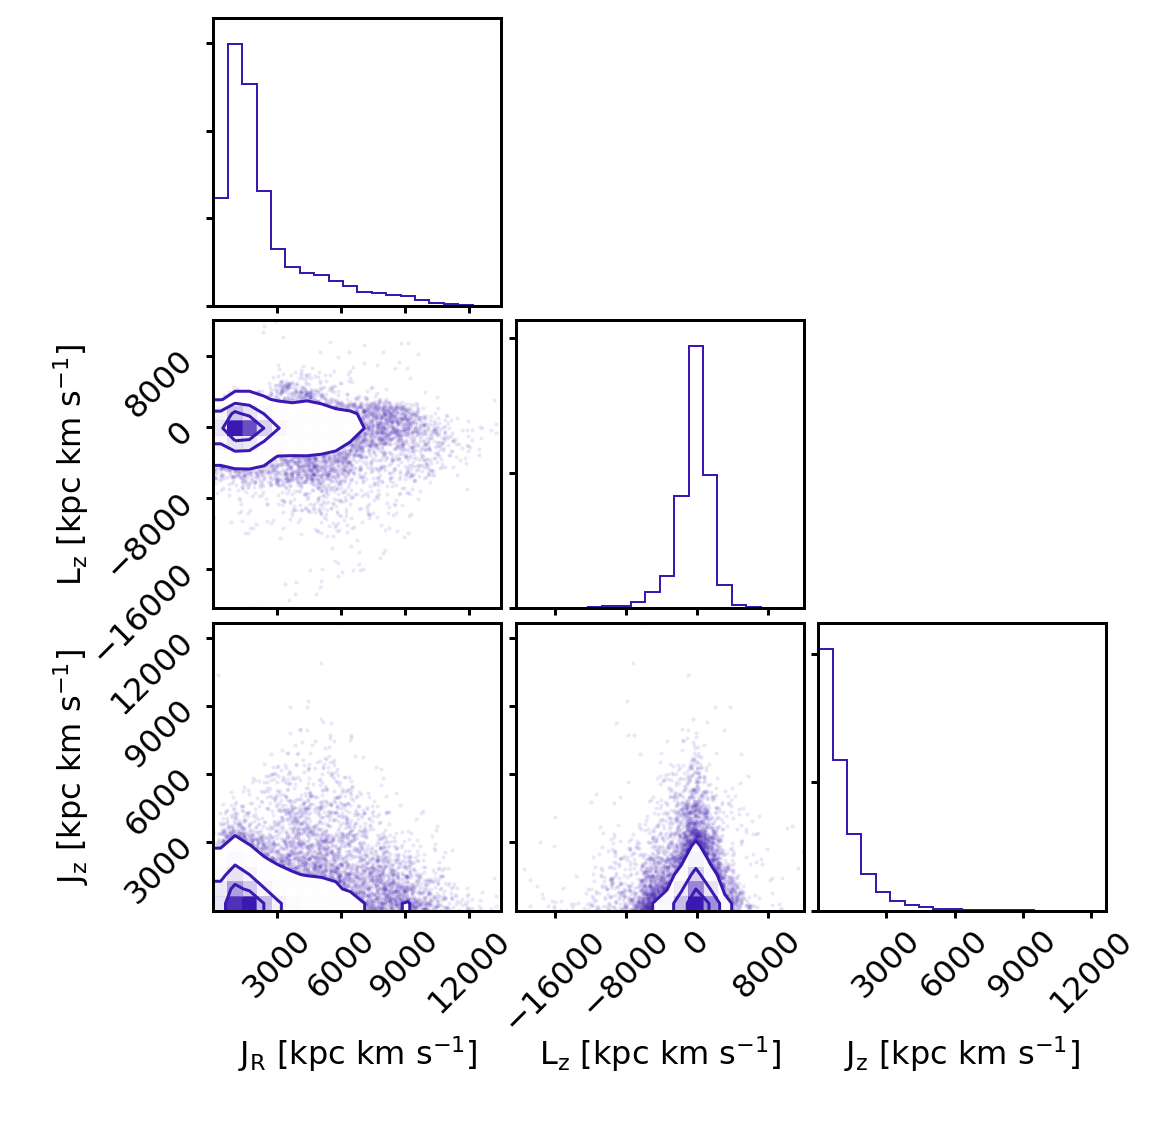

level   : 4
halo    : 24
snapnr  : 118
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1704816 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023015499114990234
redshift: 0.10986994045882548
time    : 0.9010064725120812
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9965390236093659.
17:48:18.830573
0
17:49:15.259388
1000
17:50:02.942786
2000
17:51:03.023044
3000
17:52:03.610048
4000
17:53:07.197025
5000
17:54:11.028447
6000
17:55:12.764286
7000
17:56:16.140917
8000
17:57:05.930365
9000
17:58:01.242076
10000
17:58:59.951113
11000
17:59:59.114935
12000
18:00:46.998650
13000
18:01:26.353544
14000
18:02:20.853983
15000
18:03:12.628147
16000
18:04:14.152627
17000
18:05:17.451433
18000
18:06:15.543594
19000
18:07:13.867156
20000
18:08:11.915422
21000
18:09:01.930058
22000
Number of GCs w/o actions: 0
None


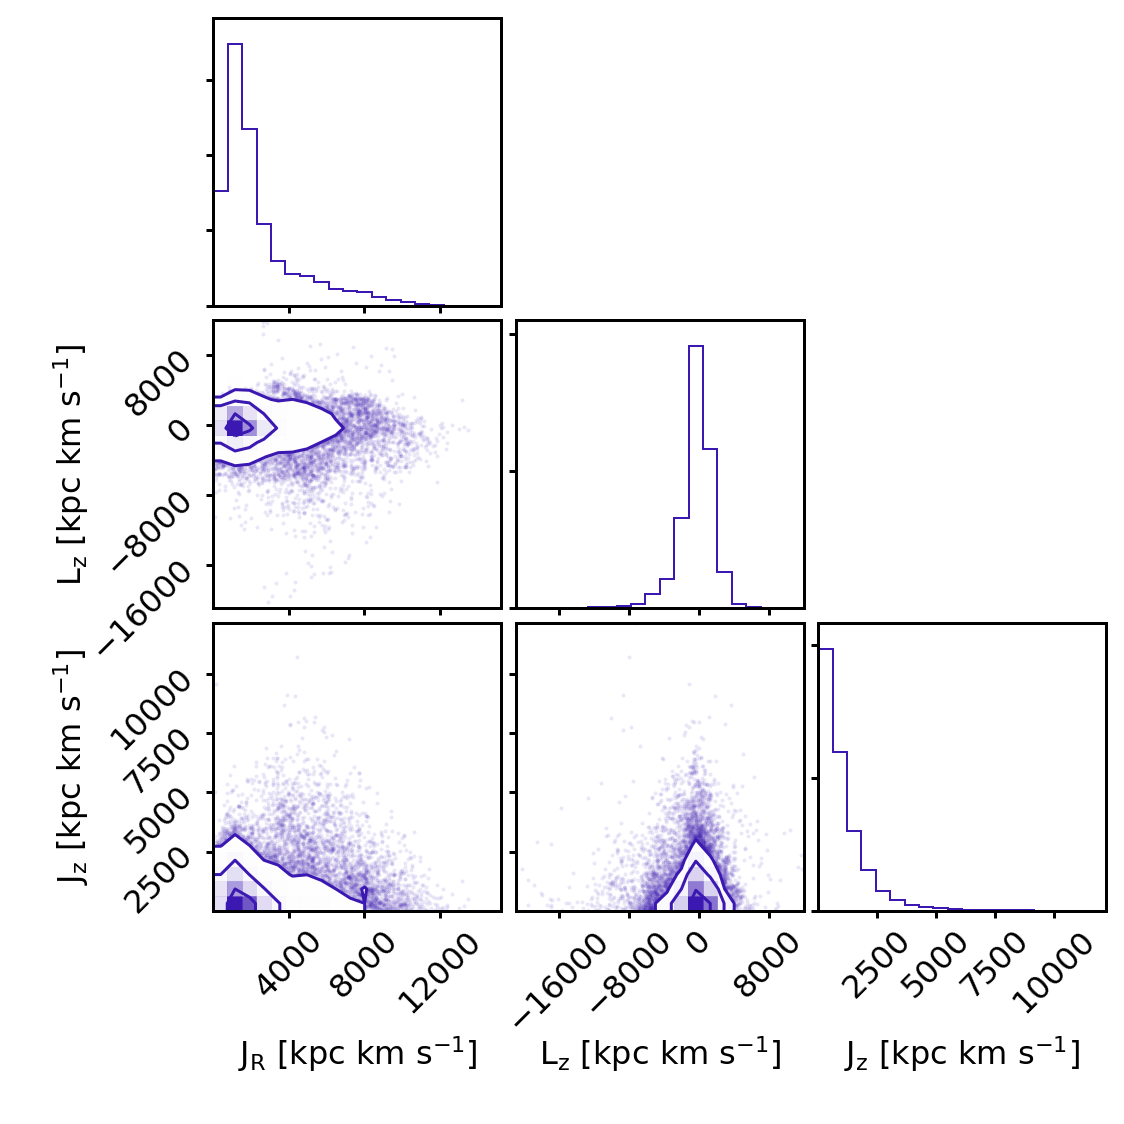

level   : 4
halo    : 24
snapnr  : 117
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1709507 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023094582557678225
redshift: 0.12575933241126092
time    : 0.8882893272206793
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9964090357331209.
18:09:38.033193
0
18:10:37.550580
1000
18:11:31.168090
2000
18:12:24.649834
3000
18:13:20.078390
4000
18:14:15.306924
5000
18:15:10.653498
6000
18:15:58.489015
7000
18:16:57.026375
8000
18:17:56.360784
9000
18:18:54.398955
10000
18:19:52.326306
11000
18:20:50.358042
12000
18:21:47.954854
13000
18:22:35.142573
14000
18:23:31.602458
15000
18:24:09.933612
16000
18:25:04.660742
17000
18:26:00.782768
18000
18:27:00.582923
19000
18:28:05.996252
20000
18:28:58.192533
21000
18:29:58.384287
22000
Number of GCs w/o actions: 0
None


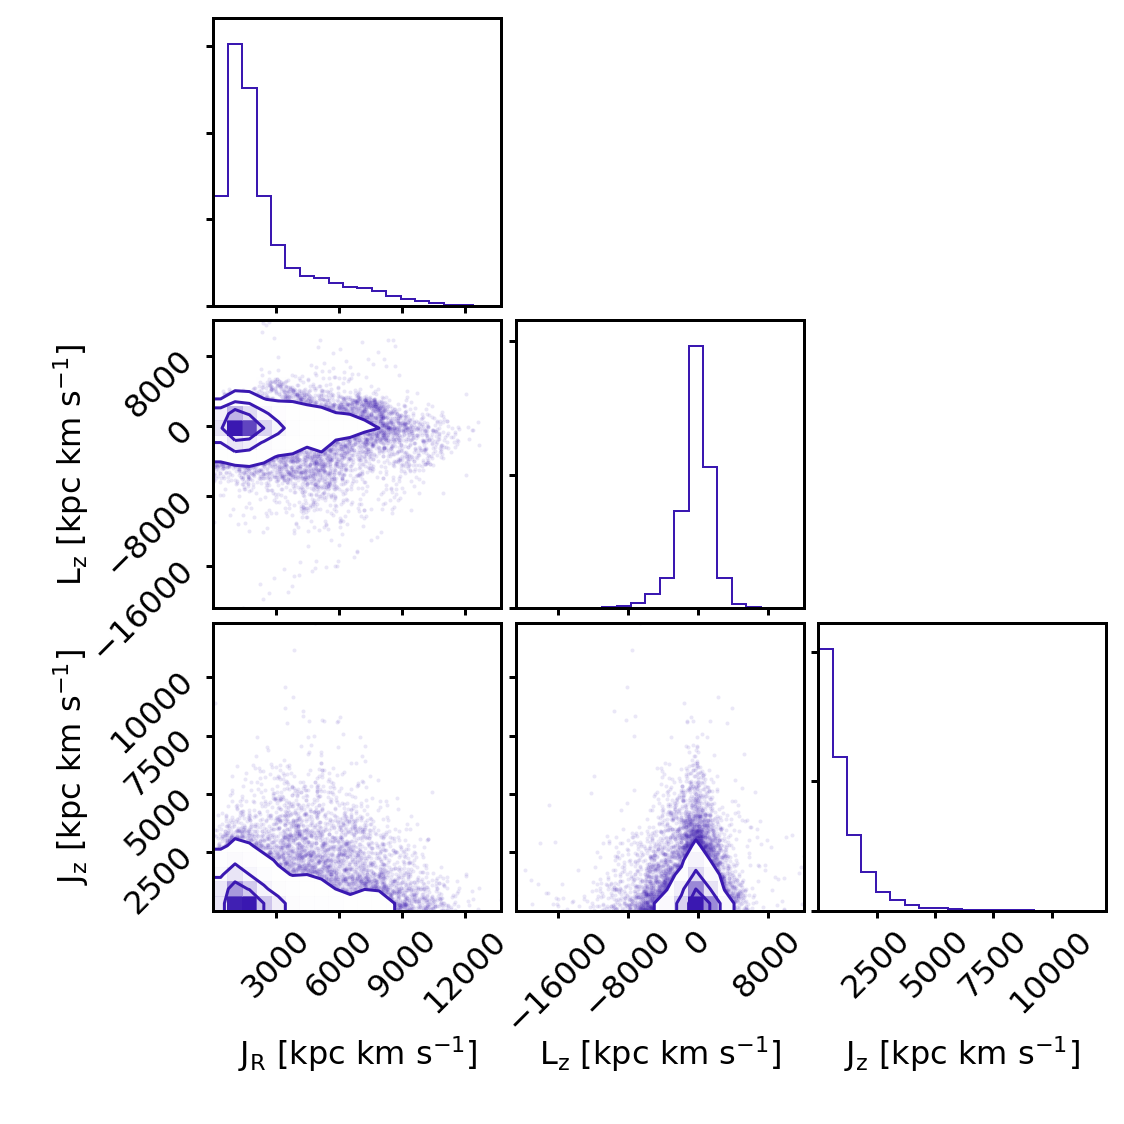

level   : 4
halo    : 24
snapnr  : 116
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1690508 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023121218383312228
redshift: 0.14187620396956202
time    : 0.8757516765159388
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.996460893514413.
18:30:35.220680
0
18:31:37.360710
1000
18:32:36.179006
2000
18:33:39.658026
3000
18:34:39.471114
4000
18:35:27.664688
5000
18:36:26.679325
6000
18:37:26.955894
7000
18:38:28.541767
8000
18:39:26.979409
9000
18:40:26.953967
10000
18:41:26.775927
11000
18:42:11.475854
12000
18:43:10.529611
13000
18:44:09.738517
14000
18:45:04.999305
15000
18:45:47.453358
16000
18:46:45.432849
17000
18:47:44.563394
18000
18:48:33.609468
19000
18:49:34.469790
20000
18:50:37.761603
21000
18:51:38.205216
22000
Number of GCs w/o actions: 0
None


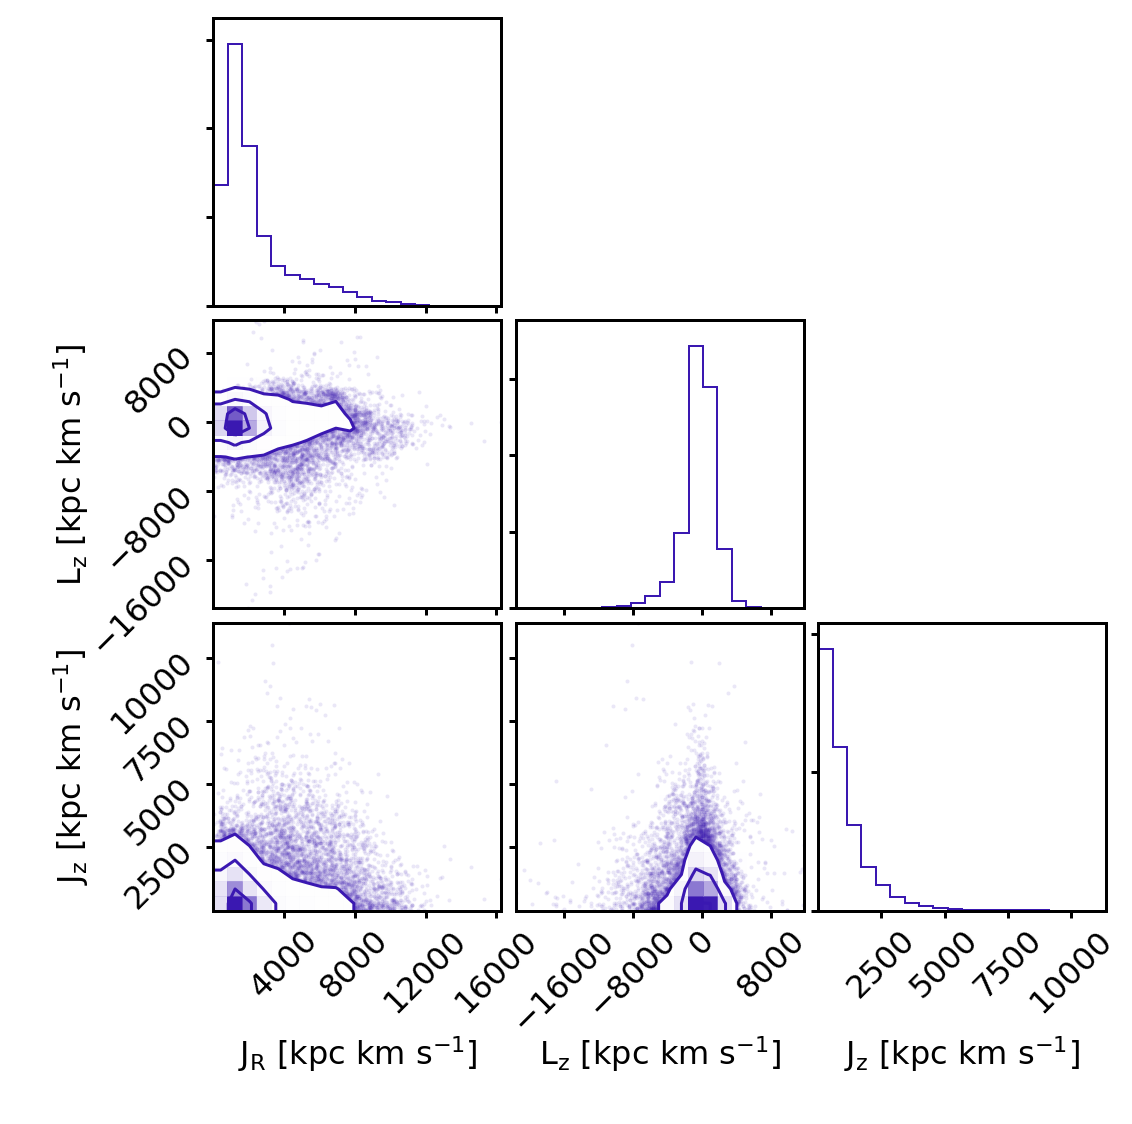

level   : 4
halo    : 24
snapnr  : 115
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1689680 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023059283196926118
redshift: 0.15274876890238098
time    : 0.8674917093619414
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9965922036456221.
18:52:14.401483
0
18:53:16.410930
1000
18:54:16.003930
2000
18:55:09.706647
3000
18:56:04.809562
4000
18:57:08.570102
5000
18:58:09.504142
6000
18:59:06.683440
7000
19:00:02.839315
8000
19:00:57.498792
9000
19:01:48.969127
10000
19:02:35.804946
11000
19:03:34.534353
12000
19:04:34.493894
13000
19:05:34.577917
14000
19:06:19.235473
15000
19:07:13.451505
16000
19:08:09.772954
17000
19:09:01.424190
18000
19:10:04.688794
19000
19:11:06.838250
20000
19:12:04.671342
21000
19:13:03.059573
22000
Number of GCs w/o actions: 0
None


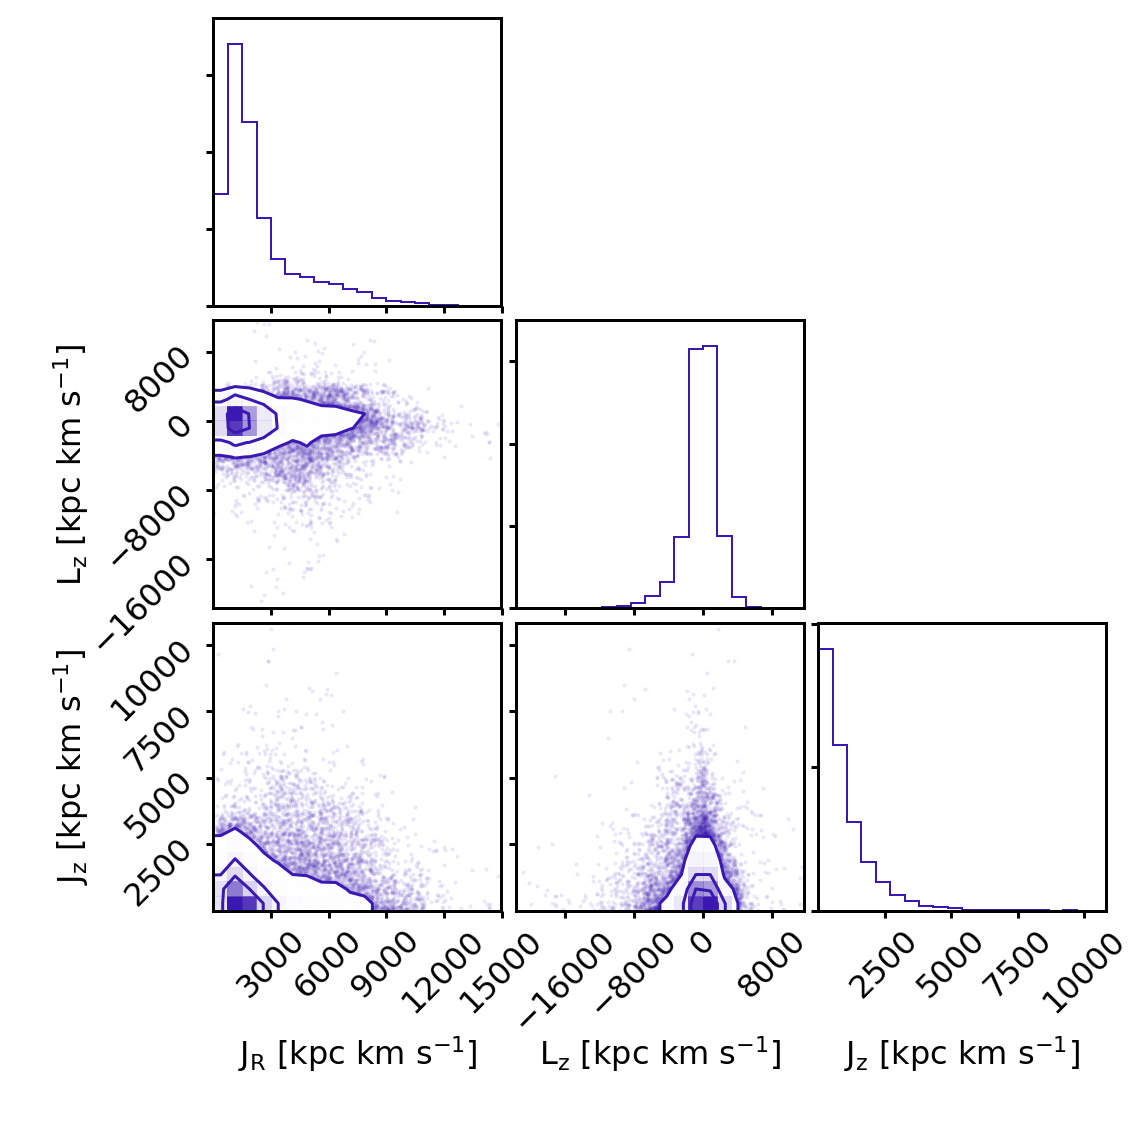

level   : 4
halo    : 24
snapnr  : 114
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1680675 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02292117774486542
redshift: 0.1692520332436107
time    : 0.8552476040823377
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9969214094332757.
19:13:39.602658
0
19:14:41.659986
1000
19:15:31.606927
2000
19:16:29.142270
3000
19:17:23.686280
4000
19:18:17.981247
5000
19:19:13.949770
6000
19:20:13.973282
7000
19:21:12.856252
8000
19:22:03.686561
9000
19:23:02.287476
10000
19:24:02.774104
11000
19:25:01.088731
12000
19:25:58.453991
13000
19:27:00.658345
14000
19:27:52.800252
15000
19:28:43.686079
16000
19:29:26.384043
17000
19:30:25.754594
18000
19:31:30.172754
19000
19:32:33.871284
20000
19:33:31.639597
21000
19:34:30.415822
22000
Number of GCs w/o actions: 0
None


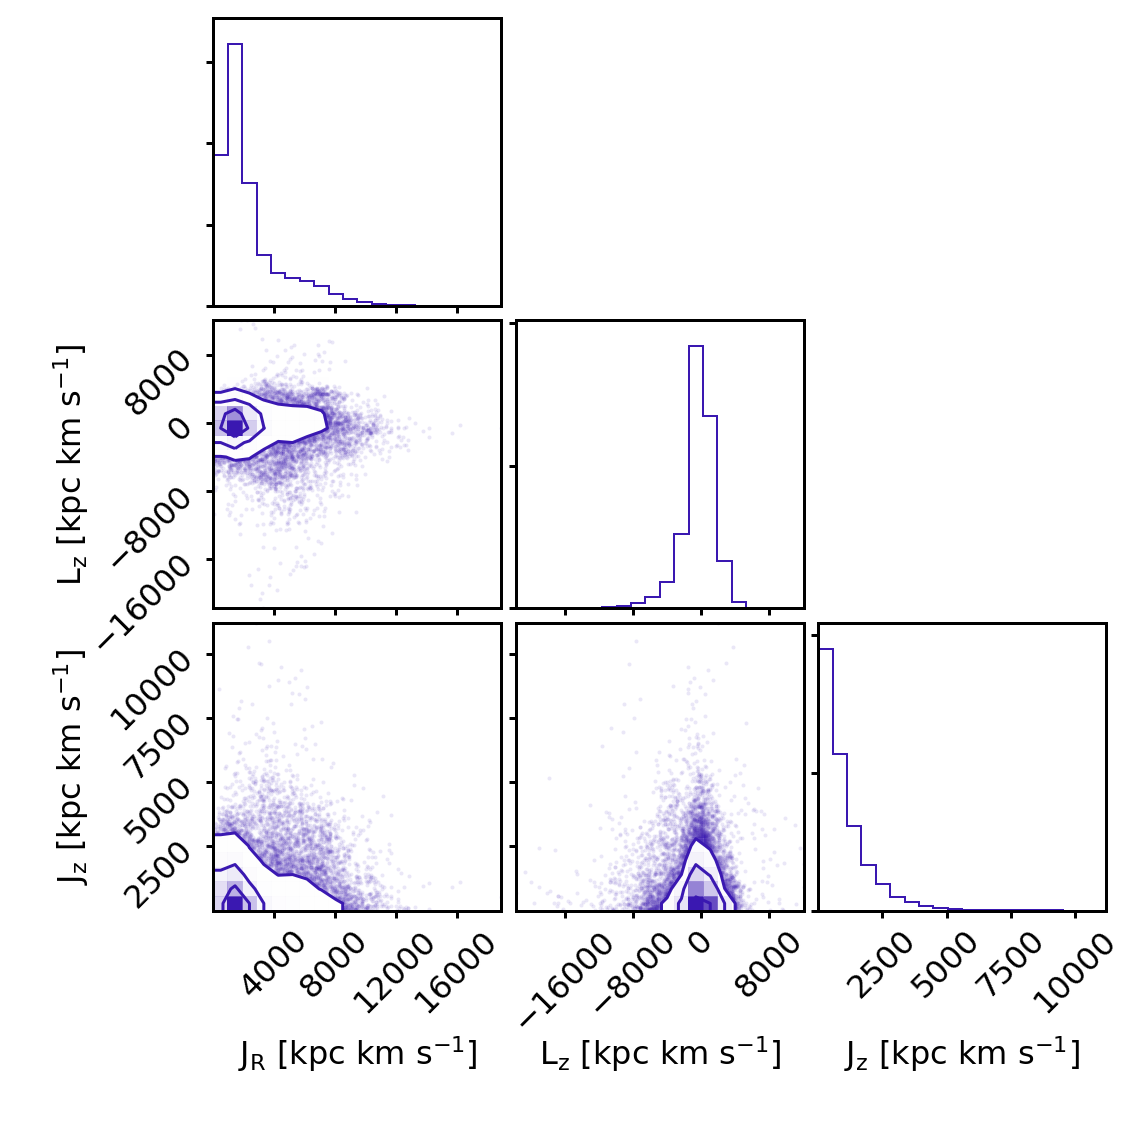

level   : 4
halo    : 24
snapnr  : 113
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1636296 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022813534736633303
redshift: 0.1803852617057493
time    : 0.8471810284677068
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9972187156975711.
19:35:06.067276
0
19:36:08.369745
1000
19:37:10.410182
2000
19:38:15.245302
3000
19:39:18.037997
4000
19:40:12.120215
5000
19:41:16.539423
6000
19:42:20.896195
7000
19:43:23.798633
8000
19:44:27.485658
9000
19:45:21.290669
10000
19:46:24.718035
11000
19:47:28.916805
12000
19:48:30.497999
13000
19:49:34.936341
14000
19:50:37.787994
15000
19:51:30.764367
16000
19:52:34.343239
17000
19:53:37.990387
18000
19:54:17.724386
19000
19:55:09.200079
20000
19:56:10.921072
21000
19:57:04.968299
22000
Number of GCs w/o actions: 0
None


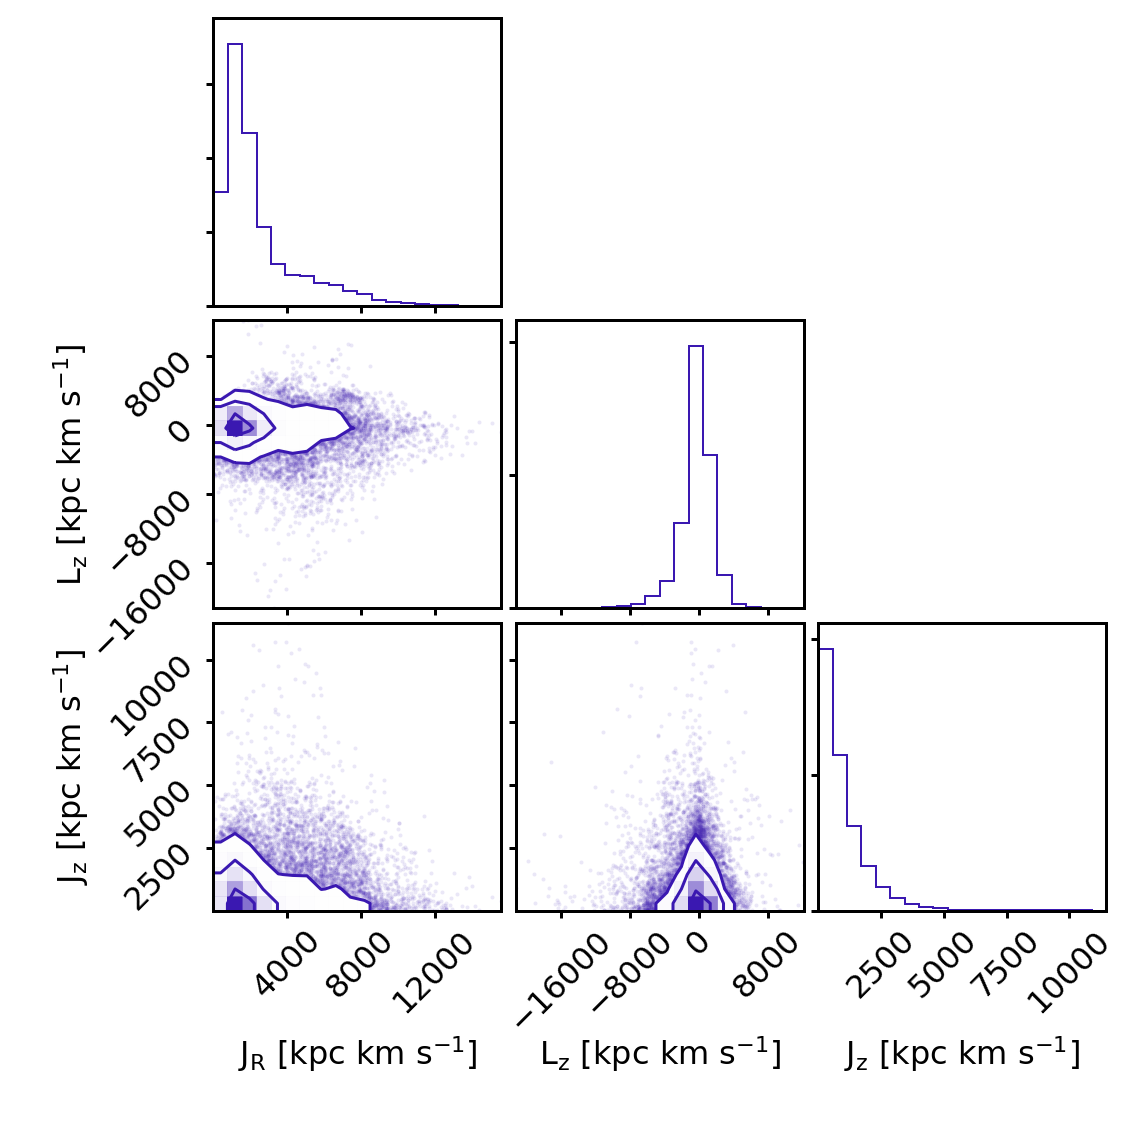

level   : 4
halo    : 24
snapnr  : 112
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1681756 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022649659216403963
redshift: 0.19728418237600986
time    : 0.8352235958012078
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9977599482621657.
19:57:38.673943
0
19:58:42.319120
1000
19:59:46.780135
2000
20:00:53.329753
3000
20:01:50.256897
4000
20:02:51.976168
5000
20:03:57.650234
6000
20:05:05.729900
7000
20:06:13.669909
8000
20:07:09.291018
9000
20:08:10.600169
10000
20:09:12.649618
11000
20:10:07.094519
12000
20:10:54.437779
13000
20:11:42.754743
14000
20:12:29.545937
15000
20:13:07.255939
16000
20:13:45.644440
17000
20:14:30.259333
18000
20:15:19.263634
19000
20:16:12.216988
20000
20:17:08.963593
21000
20:18:06.275978
22000
Number of GCs w/o actions: 0
None


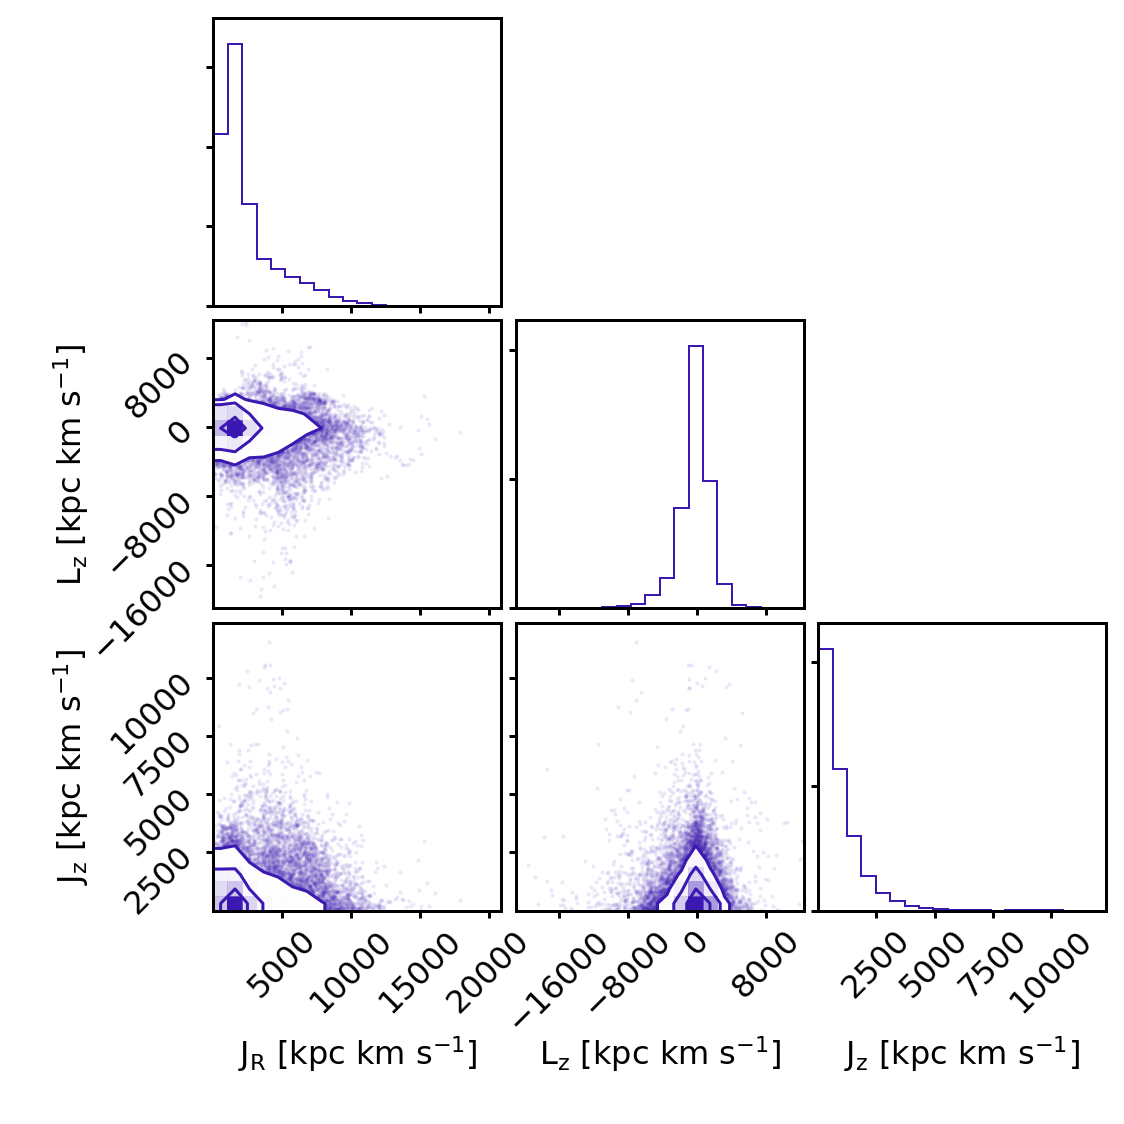

level   : 4
halo    : 24
snapnr  : 111
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1611388 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02241901010274887
redshift: 0.21442503551449454
time    : 0.823434934850752
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9983861399398812.
20:18:45.446762
0
20:19:37.288742
1000
20:20:23.887865
2000
20:21:17.411231
3000
20:22:11.402292
4000
20:23:04.924666
5000
20:24:03.795236
6000
20:25:03.801865
7000
20:26:04.243363
8000
20:26:54.389102
9000
20:27:52.989433
10000
20:28:53.954595
11000
20:29:55.661585
12000
20:30:57.448792
13000
20:31:58.948504
14000
20:32:52.230744
15000
20:33:53.595274
16000
20:34:53.919786
17000
20:35:55.200091
18000
20:36:56.548256
19000
20:37:57.213529
20000
20:38:58.450456
21000
20:39:49.295354
22000
Number of GCs w/o actions: 0
None


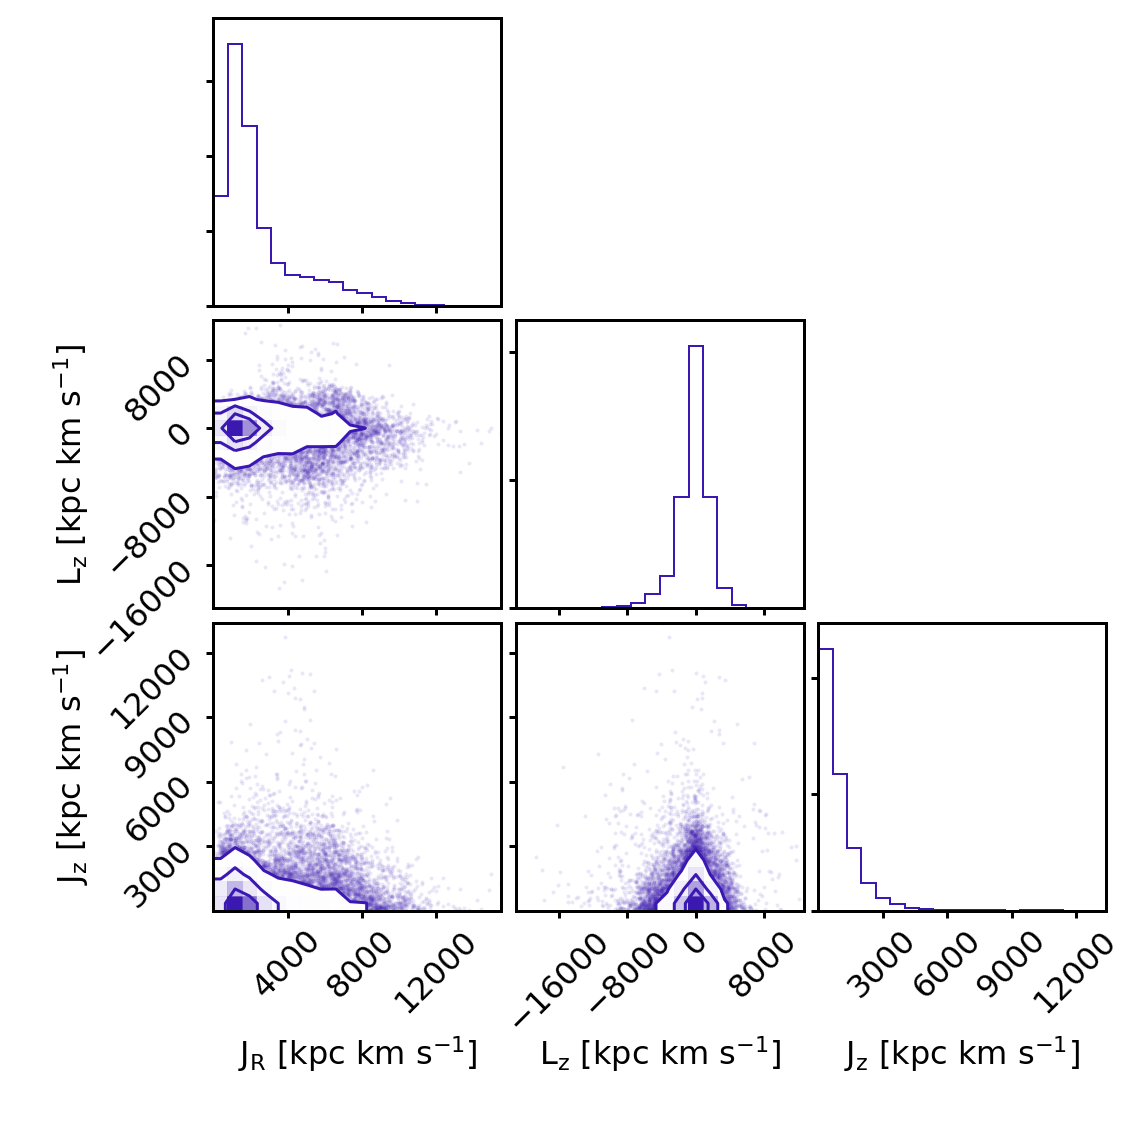

level   : 4
halo    : 24
snapnr  : 110
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1596516 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022285720705986025
redshift: 0.22598838626019768
time    : 0.8156684118765909
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9988333667154161.
20:40:26.901546
0
20:41:28.292265
1000
20:42:15.701827
2000
20:43:11.681377
3000
20:44:09.972921
4000
20:45:08.082739
5000
20:45:57.546200
6000
20:46:57.288727
7000
20:47:59.216188
8000
20:49:02.035122
9000
20:50:04.621768
10000
20:51:02.861030
11000
20:51:53.112340
12000
20:52:53.663517
13000
20:53:53.251140
14000
20:54:55.937334
15000
20:55:56.519070
16000
20:56:55.735518
17000
20:57:41.500673
18000
20:58:37.089141
19000
20:59:37.216924
20000
21:00:39.792807
21000
21:01:45.180295
22000
Number of GCs w/o actions: 0
None


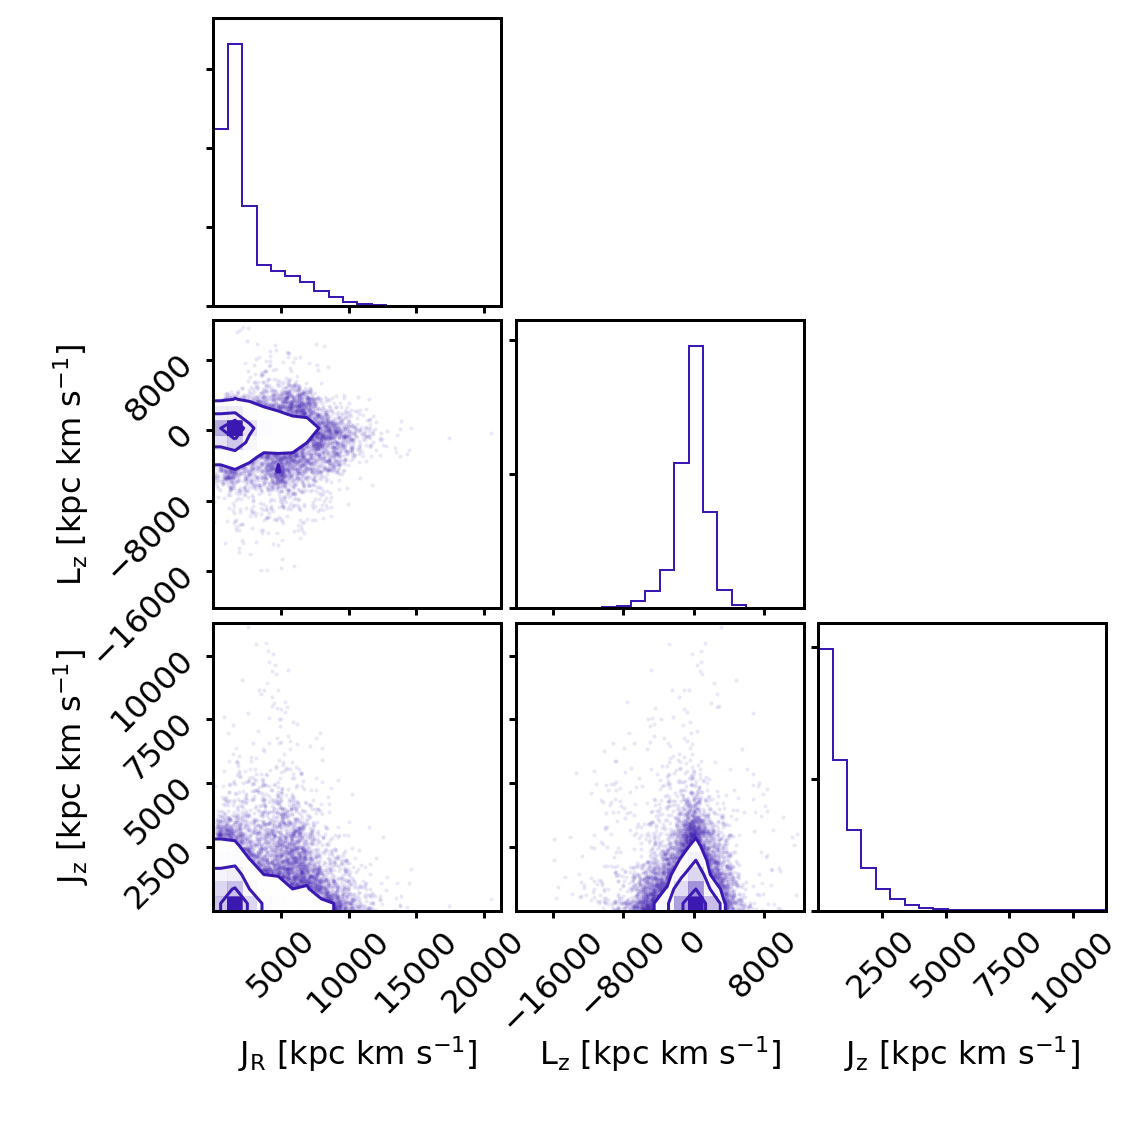

level   : 4
halo    : 24
snapnr  : 109
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1597012 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022122310101985933
redshift: 0.24354018155467028
time    : 0.8041557601699713
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 0.9995219643591322.
21:02:24.815916
0
21:03:18.258454
1000
21:04:17.564413
2000
21:05:18.658529
3000
21:06:23.790642
4000
21:07:10.531745
5000
21:08:17.349151
6000
21:09:16.766298
7000
21:10:24.090475
8000
21:11:31.594761
9000
21:12:37.569604
10000
21:13:43.382957
11000
21:14:46.658668
12000
21:15:38.584174
13000
21:16:40.298972
14000
21:17:45.578339
15000
21:18:49.470036
16000
21:19:51.589554
17000
21:20:43.651679
18000
21:21:42.916563
19000
21:22:42.104856
20000
21:23:42.227461
21000
21:24:38.348131
22000
Number of GCs w/o actions: 0
None


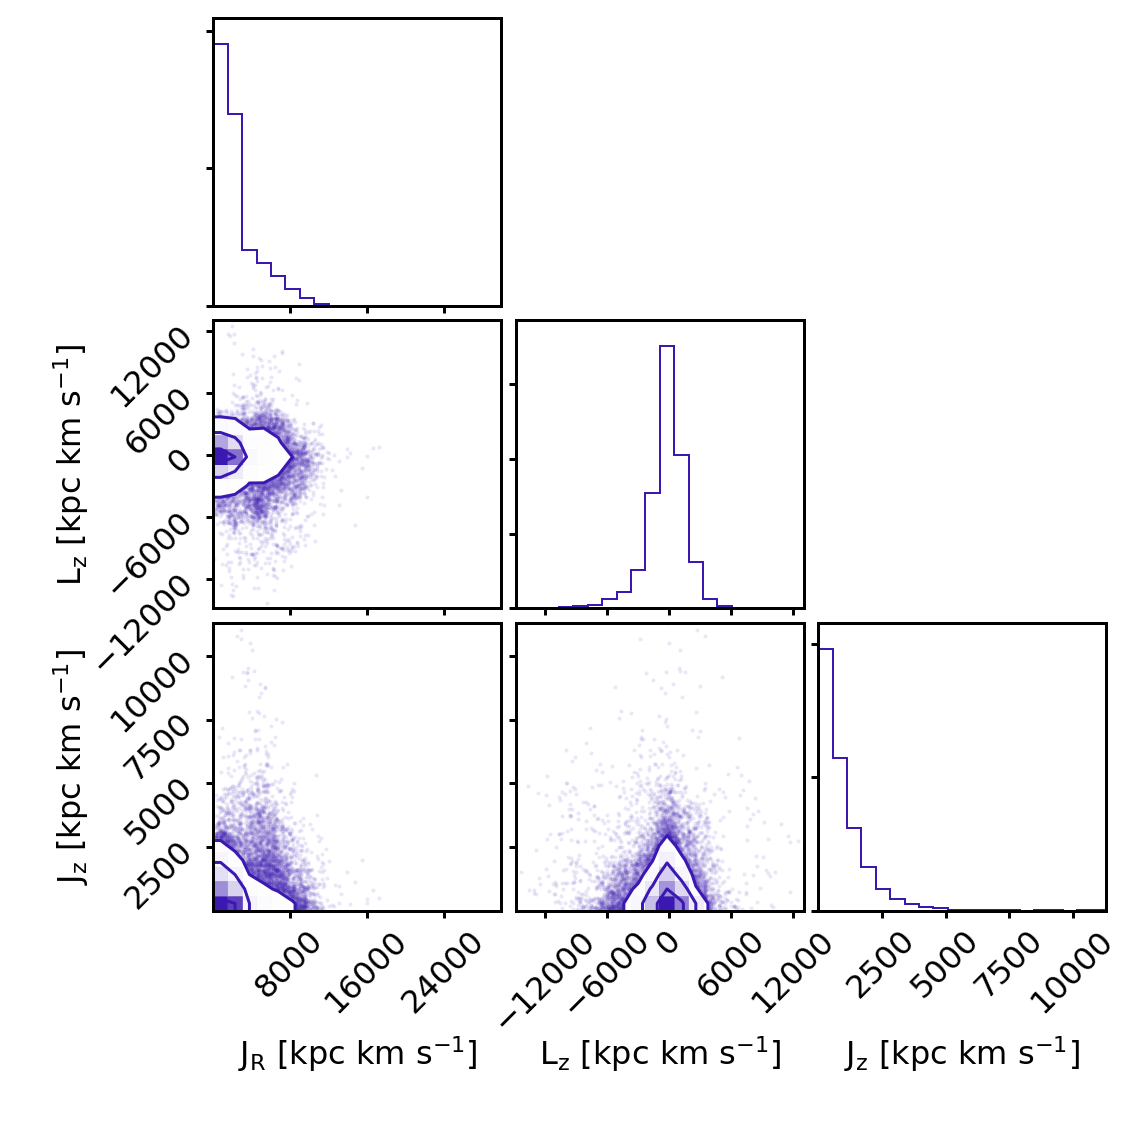

level   : 4
halo    : 24
snapnr  : 108
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1625123 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02170633673667908
redshift: 0.2613432561610123
time    : 0.7928056023731169
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0002000482244986.
21:25:16.226658
0
21:26:11.791866
1000
21:27:00.910199
2000
21:27:47.324110
3000
21:28:43.271847
4000
21:29:44.685021
5000
21:30:38.450410
6000
21:31:37.199758
7000
21:32:12.183598
8000
21:32:58.462304
9000
21:33:56.253558
10000
21:34:54.326267
11000
21:35:52.466060
12000
21:36:47.758484
13000
21:37:43.635300
14000
21:38:39.857238
15000
21:39:30.507259
16000
21:40:22.349835
17000
21:41:13.035511
18000
21:42:07.495535
19000
21:43:04.699253
20000
21:44:02.384905
21000
21:45:02.272695
22000
Number of GCs w/o actions: 0
None


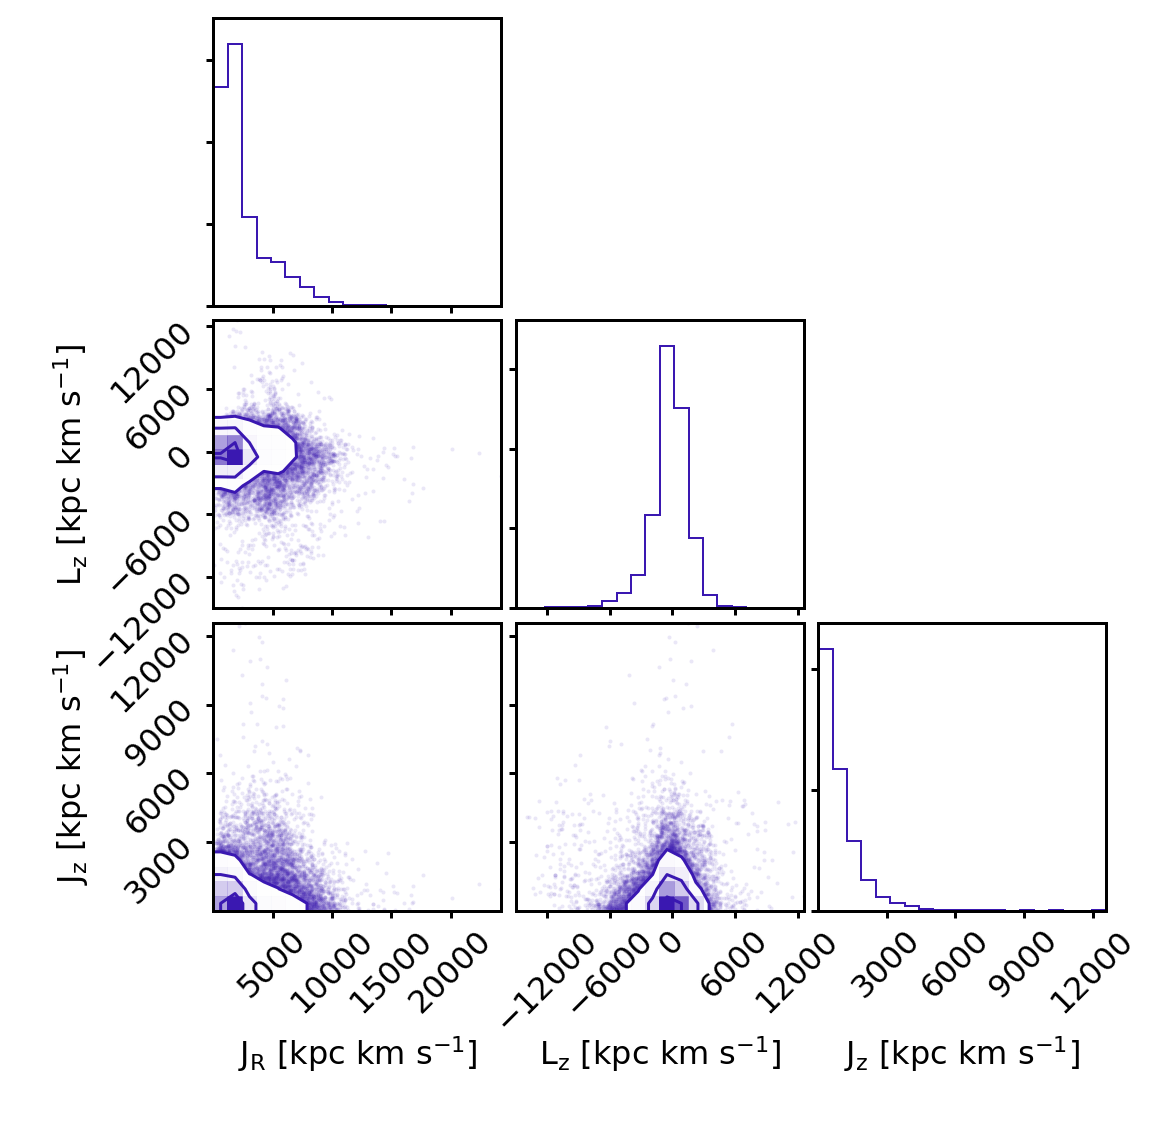

level   : 4
halo    : 24
snapnr  : 107
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1562371 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021586434543132783
redshift: 0.2733533465784399
time    : 0.7853279709729014
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0006293778437656.
21:45:40.743442
0
21:46:15.585958
1000
21:46:50.884449
2000
21:47:27.330942
3000
21:48:23.627270
4000
21:49:09.322425
5000
21:49:44.928268
6000
21:50:21.080666
7000
21:50:56.278399
8000
21:51:31.927920
9000
21:52:05.912953
10000
21:52:27.202440
11000
21:52:53.127786
12000
21:53:26.741556
13000
21:54:00.590082
14000
21:54:45.228790
15000
21:56:04.565626
16000
21:57:26.050897
17000
21:58:47.233964
18000
22:00:08.197023
19000
22:03:05.908596
20000
22:05:45.815311
21000
22:08:20.045742
22000
Number of GCs w/o actions: 0
None


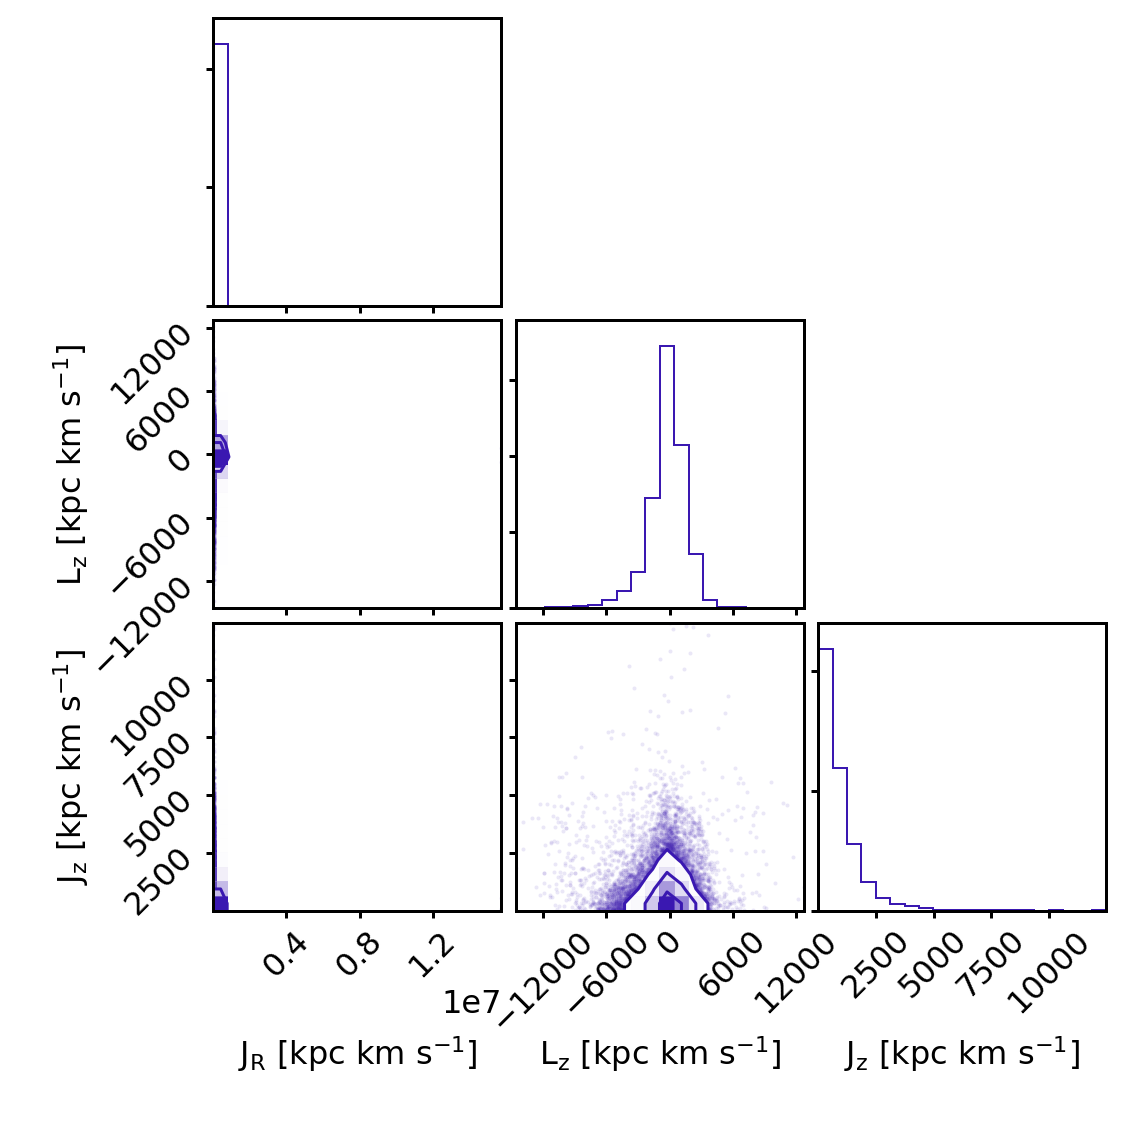

level   : 4
halo    : 24
snapnr  : 106
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1553881 stars.
Rotated pos.
Rotated vel.

galrad  : 0.0215757355093956
redshift: 0.29158323972192446
time    : 0.7742435556962617
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.001216087145605.
22:09:07.997557
0
22:10:31.101060
1000
22:12:04.514431
2000
22:13:25.728482
3000
22:14:52.791290
4000
22:16:16.244877
5000
22:17:34.678612
6000
22:18:31.809027
7000
22:19:10.237514
8000
22:19:46.118821
9000
22:20:07.504524
10000
22:20:34.110552
11000
22:21:09.792487
12000
22:21:43.941271
13000
22:22:22.338689
14000
22:23:18.144692
15000
22:23:54.686476
16000
22:24:30.762205
17000
22:25:09.989196
18000
22:25:48.871016
19000
22:26:27.953740
20000
22:27:07.042319
21000
22:27:45.987791
22000
Number of GCs w/o actions: 0
None


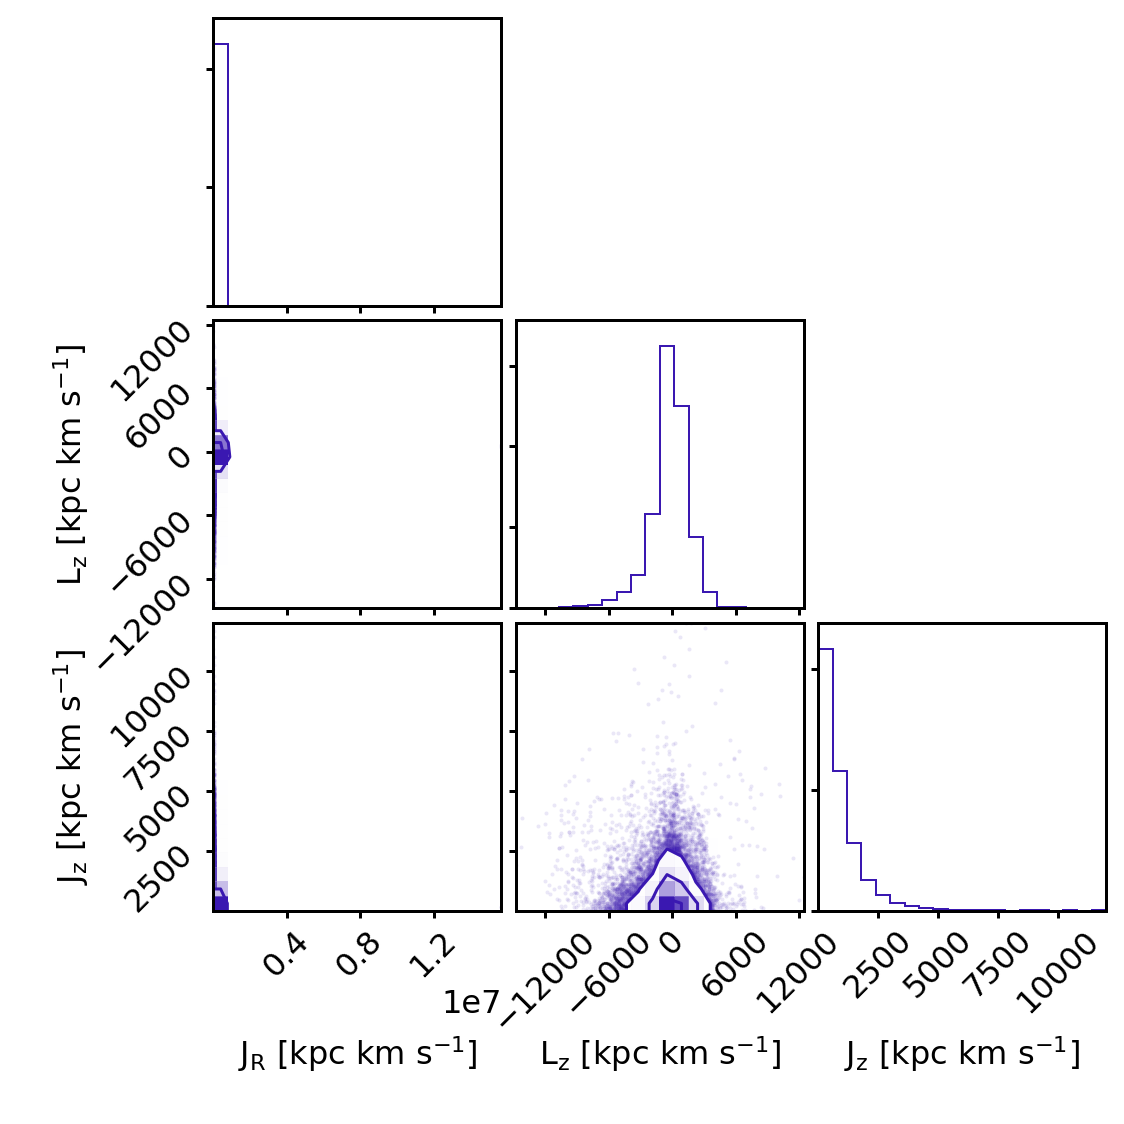

level   : 4
halo    : 24
snapnr  : 105
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1524327 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021507640182971955
redshift: 0.31007412012783386
time    : 0.7633155900388464
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0017096692935015.
22:28:21.984726
0
22:28:57.754002
1000
22:30:08.275910
2000
22:31:31.323920
3000
22:32:51.768267
4000
22:34:28.226402
5000
22:36:10.137019
6000
22:37:28.677825
7000
22:38:33.950371
8000
22:39:36.726311
9000
22:40:15.475460
10000
22:41:44.571794
11000
22:43:04.529366
12000
22:44:33.036381
13000
22:46:05.516210
14000
22:47:31.875686
15000
22:49:12.614949
16000
22:50:37.414340
17000
22:52:00.276796
18000
22:53:27.707368
19000
22:54:54.531870
20000
22:56:14.762682
21000
22:57:19.624353
22000
Number of GCs w/o actions: 0
None


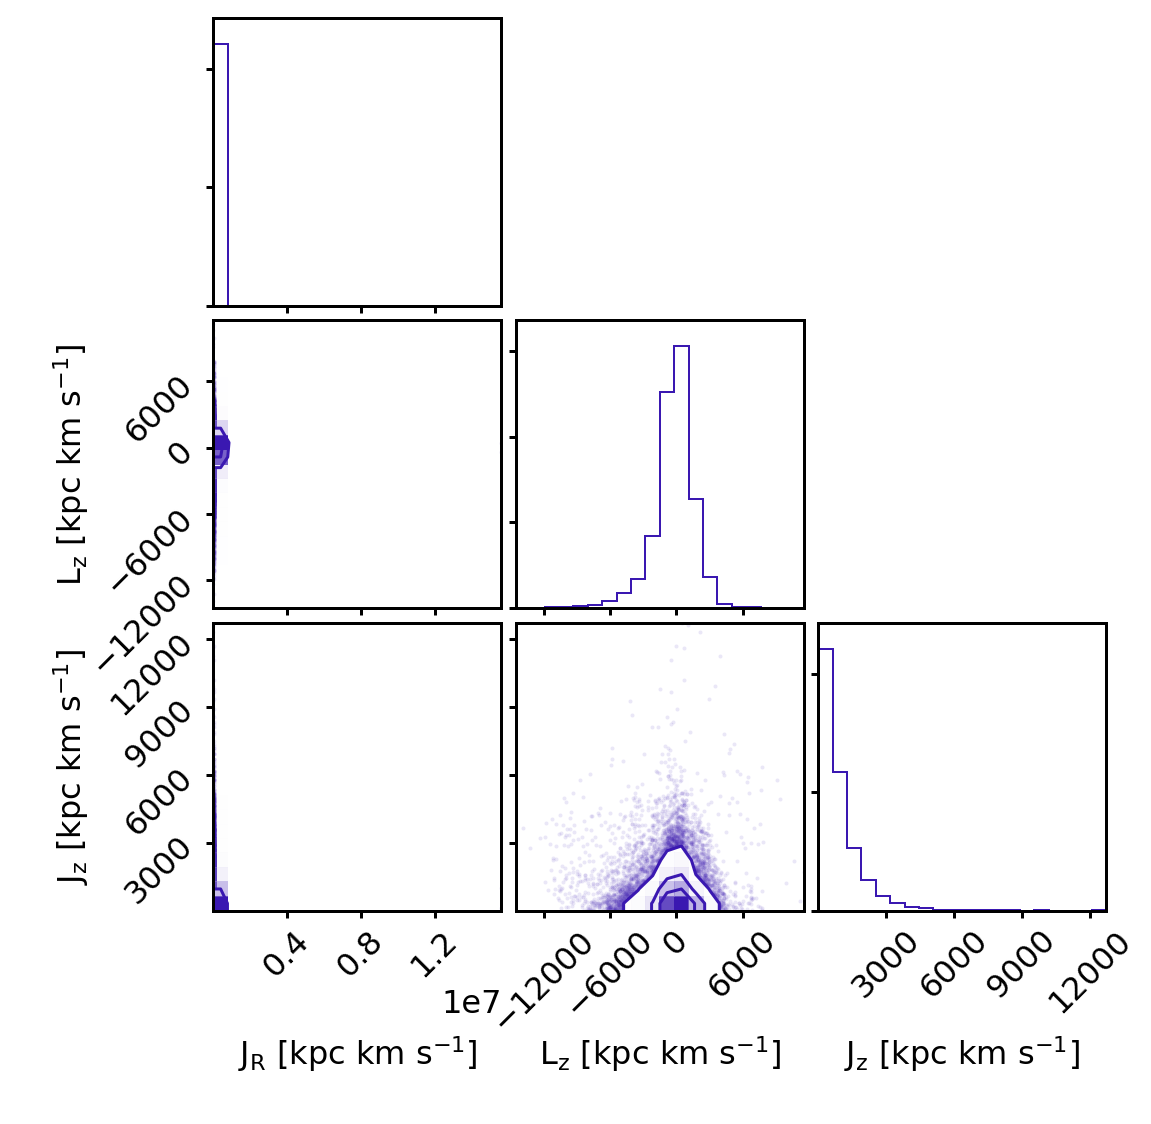

level   : 4
halo    : 24
snapnr  : 104
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1532350 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02135048806667328
redshift: 0.32882972420595435
time    : 0.7525418658117033
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.002087352036116.
22:57:58.874408
0
22:59:16.126957
1000
23:00:44.121258
2000
23:02:12.227174
3000
23:03:37.356376
4000
23:05:04.278656
5000
23:06:04.092965
6000
23:07:40.110694
7000
23:09:17.949189
8000
23:10:49.437907
9000
23:12:15.000151
10000
23:13:43.635639
11000
23:15:14.545497
12000
23:16:47.086599
13000
23:18:11.620660
14000
23:19:39.121262
15000
23:20:47.602714
16000
23:22:28.304182
17000
23:24:08.640520
18000
23:25:40.959455
19000
23:26:46.492877
20000
23:27:46.341565
21000
23:29:06.334135
22000
Number of GCs w/o actions: 0
None


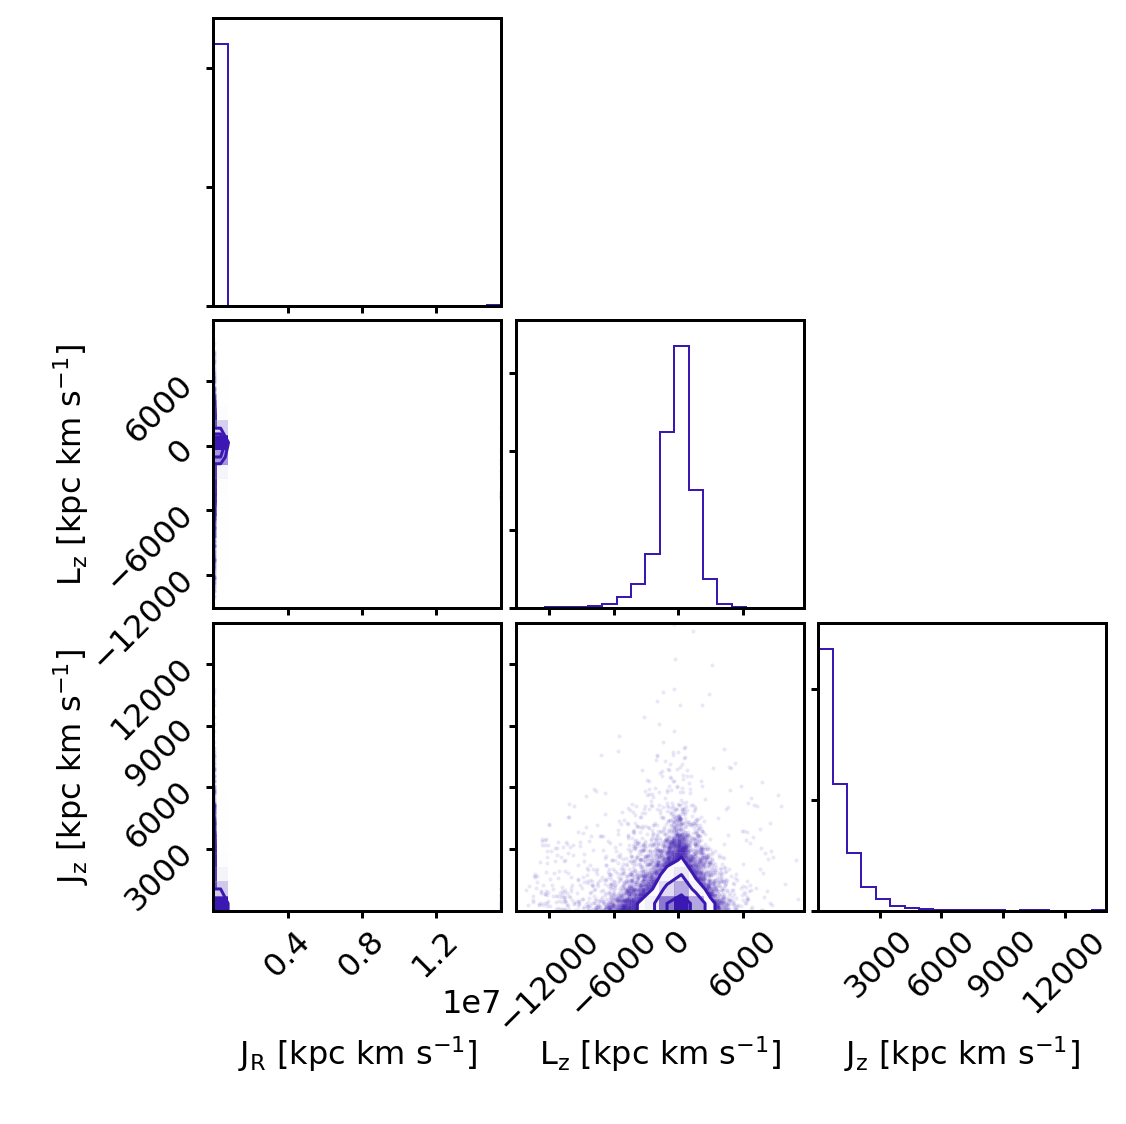

level   : 4
halo    : 24
snapnr  : 103
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1509390 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021213290095329285
redshift: 0.3478538418581776
time    : 0.7419202059930923
center  : [ 0.  0.  0.]

Number of GCs: 22079.
Sum of normalizations after fitting potential parameters: 1.0023320448043997.
23:29:46.483982
0
23:30:47.829168
1000
23:31:12.847457
2000
23:31:41.065734
3000
23:32:43.442321
4000
23:33:29.409166
5000
23:34:08.552417
6000
23:35:33.425441
7000
23:37:06.122276
8000
23:38:40.700351
9000
23:40:00.177708
10000
23:41:22.261565
11000
23:42:37.013406
12000
23:43:50.862918
13000
23:45:09.768873
14000
23:46:24.910847
15000
23:47:40.862995
16000
23:49:03.741175
17000
23:50:27.224052
18000
23:51:34.363946
19000


In [ ]:
level = 4

startnr = 60
endnr   = 128

colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
 #2, 3, 4
zsignchange = [False, False, True]
excludedisk = [True, True, True]
for prognr in [3,4]:
    for jj in range(1):
        if zsignchange[jj]: 
            print("exclude particles which change signs while in disk radius")
            infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        elif excludedisk[jj]:
            print('exclude particles which are in disk')
            infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        else:
            print('keep em all')
            infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)

        IDs = np.loadtxt(filedir + infilename)
        progcolor = colors[prognr]

        for halo_number in [24]:  # range(1, 31):
            halodir = basedir+"halo_{0}/".format(halo_number)
            snappath = halodir+"output/"

            for snapnr in range(endnr-1, startnr-1, -1):
                i = snapnr - startnr

                print("level   : {0}".format(level))
                print("halo    : {0}".format(halo_number))
                print("snapnr  : {0}".format(snapnr))
                print("basedir : {0}".format(basedir))
                print("halodir : {0}".format(halodir))
                print("snappath: {0}\n".format(snappath))
                s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
                    haloid=0, galradfac=0.1, verbose=True) 

                # Clean negative and zero values of gmet to avoid RuntimeErrors
                # later on (e.g. dividing by zero)
                s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )

                if zsignchange[jj]: 
                    outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}.png'.format(prognr, snapnr)
                elif excludedisk[jj]:
                    outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}.png'.format(prognr, snapnr)
                else:
                    outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}.png'.format(prognr, snapnr)

                gcmask = np.isin(s.id, IDs)
                print('Number of GCs: {}.'.format(np.sum(gcmask)))

                print('Sum of normalizations after fitting potential parameters: {}.'.format(np.sum([n_MND[i], n_NFWH[i], n_HB[i]])))

                pot_galpy = setup_galpy_potential(a_MND_kpc_all[i], b_MND_kpc_all[i], a_NFWH_kpc_all[i], a_HB_kpc_all[i], n_MND[i], n_NFWH[i], n_HB[i], R0_kpc_all[i])

                # this would mean that there are no merged GCs
                if np.sum(gcmask) == 0:
                    print("Skipped snap {} since there are no merged GCs.".format(snapnr))
                    #continue


                # get position and velocities of all selected GCs & convert to galpy units
                (R_kpc, phi_rad, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, gcmask)
                # convert physical to galpy units by dividing by REF vals (get velocities from best fit parameters)
                fix_v0_kms = v0_kms_all[i]
                fix_R0_kpc = R0_kpc_all[i]
                R_galpy, vR_galpy, vT_galpy, z_galpy, vz_galpy = R_kpc / fix_R0_kpc, vR_kms / fix_v0_kms, vphi_kms / fix_v0_kms, z_kpc / fix_R0_kpc, vz_kms / fix_v0_kms

                # estimate Delta of the Staeckel potential
                delta = 0.45
                delta = estimateDeltaStaeckel(pot_galpy, R_galpy, z_galpy)
                # CHECK HOW BIG INFLUENCE OF DELTA IS


                # set up the actionAngleStaeckel object
                aAS = actionAngleStaeckel(
                        pot   = pot_galpy,  # potential
                        delta = delta,      # focal length of confocal coordinate system
                        c     = True        # use C code (for speed)
                        )

                jR_galpy, lz_galpy, jz_galpy, r_kpc = np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs))
                savedIDs = np.zeros(len(IDs))
                IDs_notworking = []
                for test_i, item in enumerate(IDs):
                    if (test_i % 1000) == 0:
                        print(datetime.datetime.now().time())
                        print(test_i)
                    try: 
                        jR_galpy[test_i], lz_galpy[test_i], jz_galpy[test_i] = aAS(R_galpy[test_i], vR_galpy[test_i], vT_galpy[test_i], z_galpy[test_i], vz_galpy[test_i])
                        r_kpc[test_i] = np.sqrt(R_kpc[test_i]**2 + z_kpc[test_i]**2)
                        savedIDs[test_i] = item
                    except(ValueError, UnboundError):
                        IDs_notworking.append(item)
                        continue

                print('Number of GCs w/o actions:', len(IDs_notworking))
                jR_kpckms, lz_kpckms, jz_kpckms = jR_galpy * fix_R0_kpc * fix_v0_kms, lz_galpy * fix_R0_kpc * fix_v0_kms, jz_galpy * fix_R0_kpc * fix_v0_kms

                # just pick result values of particles of which I actually could calculate actions
                survivor_id_mask = np.isin(IDs, savedIDs)
                survivor_IDs = IDs[survivor_id_mask]
                jR_kpckms, lz_kpckms, jz_kpckms = jR_kpckms[survivor_id_mask], lz_kpckms[survivor_id_mask], jz_kpckms[survivor_id_mask]
                r_kpc = r_kpc[survivor_id_mask]

                save_data = ([survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms])
                np.savetxt(filedir + outfilename, save_data)

                data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])

                if prognr == 2:
                    actionrange = np.array([[0, 10000], [-25000,0], [0,2000]])
                else: actionrange = None
                print(actionrange)
                labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']
                figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, range = actionrange, bbox_inches = 'tight')#, range =  [(0.,7500.), (-10000.,10000.),(0., 4000.)])
                figure.savefig(plotdir + outplot)
                plt.show()
                
                

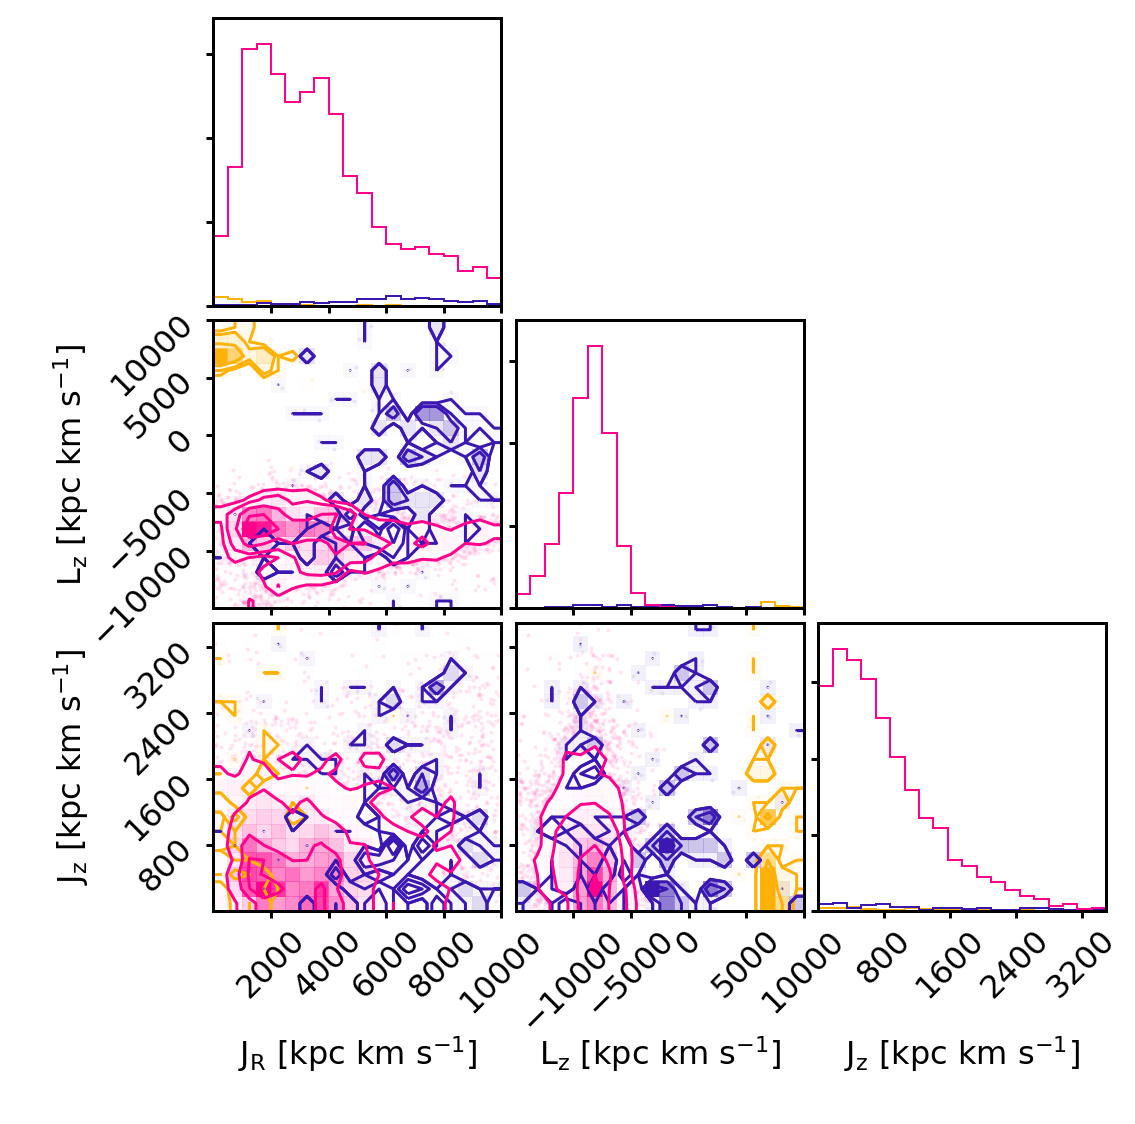

In [37]:
zsignchange = [True, False, False]
excludedisk = [True, True, False]

for jj in range(3):
    if zsignchange[jj]: 
        print("exclude particles which change signs while in disk radius")
        infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'
    elif excludedisk[jj]:
        print('exclude particles which are in disk')
        infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'
    else:
        print('keep em all')
        infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'
counter = 0
colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']

actionrange = ([0., 10000.], [-15000., 10000.], [0., 3500.])
for prognr in [4,3,2]:
    progcolor = colors[prognr]
    survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms = np.loadtxt(filedir + 'actions/right_potential/progenitor{}/actions_snap_127_dec18.txt'.format(prognr))
    data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])
    if counter == 0:
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', range = actionrange) #range = actionrange, 
        counter += 1
    else:         
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', fig = figure, range = actionrange) #range = actionrange, 
figure.savefig(plotdir + 'actions/right_potential/prog234_actions_snap_127.png')


In [ ]:
a